In [1]:
!pip install seaborn
!pip install statsmodels
!pip install scikit-bio

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skbio.diversity import alpha_diversity
from scipy.stats import mannwhitneyu
from skbio.diversity.alpha import shannon, simpson
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, f_oneway
from matplotlib.dates import DateFormatter
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
from skbio.diversity import beta_diversity
from scipy.stats import wilcoxon


In [ ]:
genus_path = ###########################
df = pd.read_csv(genus_path)
# Check for any missing values
nan_summary = df.isna().sum()
nan_columns = nan_summary[nan_summary > 0]

# Output
if nan_columns.empty:
    print("No missing (NaN) values found in the dataset.")
else:
    print("Columns with missing values:\n")
    print(nan_columns)
    
    
    # Basic inspection
print("Shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nFirst few rows:\n", df.head())

No missing (NaN) values found in the dataset.
Shape: (164, 71)

Column names:
 ['miseq_n', 'sample_n', 'sample_type', 'person', 'gender', 'sample_n_patient', 'sample_n_day', 'sample_n_time', 'g__Abiotrophia', 'g__Absconditabacteriales_(SR1)', 'g__Actinobacillus', 'g__Actinomyces', 'g__Aggregatibacter', 'g__Alloprevotella', 'g__Atopobium', 'g__Bergeyella', 'g__Butyrivibrio', 'g__Campylobacter', 'g__Candidatus_Saccharimonas', 'g__Capnocytophaga', 'g__Cardiobacterium', 'g__Catonella', 'g__Clostridia_UCG_014', 'g__Corynebacterium', 'g__Dialister', 'g__Eubacterium_brachy_group', 'g__Eubacterium_nodatum_group', 'g__Eubacterium_saphenum_group', 'g__Eubacterium_yurii_group', 'g__F0058', 'g__Filifactor', 'g__Fretibacterium', 'g__Fusobacterium', 'g__Gemella', 'g__Granulicatella', 'g__Haemophilus', 'g__Johnsonella', 'g__Kingella', 'g__Lachnoanaerobaculum', 'g__Lautropia', 'g__Lentimicrobium', 'g__Leptotrichia', 'g__Megasphaera', 'g__Mobiluncus', 'g__Mogibacterium', 'g__Neisseria', 'g__Olsenella',

In [4]:
# Ensure sample_n_patient is treated as string
df["sample_n_patient"] = df["sample_n_patient"].astype(str)

# Create boolean masks for patients and controls
is_patient = df["sample_n_patient"].str.startswith("P") # Returns true for rows where SampleIDs start with p then filters these rows from the whole df
is_control = df["sample_n_patient"].str.startswith("C")

# Create separate DataFrames
df_patients = df[is_patient].copy()
df_controls = df[is_control].copy()

# Summary
print("Total samples:", df.shape[0])
print("Patient samples:", df_patients.shape[0])
print("Control samples:", df_controls.shape[0])


Total samples: 164
Patient samples: 45
Control samples: 119


In [5]:
# Drop 'newnewnew' column
df_patients.drop(columns=["newnewnew"], inplace=True)
df_controls.drop(columns=["newnewnew"], inplace=True)

In [6]:
# Identify abundance columns
metadata_cols = [
    "miseq_n", "sample_n", "sample_type", "person", "gender",
    "sample_n_patient", "sample_n_day", "sample_n_time", "sample"
]
abundance_cols = df.select_dtypes(include=[np.number]).columns.difference(metadata_cols).tolist()


Use Alpha Diversity (Richness and Evenness) → Compare Shannon, Simpson and Richness by gender, day or time stratified by group. Are patients and controls microbially distinct?

Definition of Metrics:
- Richness: Number of different Genera. Higher = mmore genus types (regardless of amount)
- Shannon = Richness + evenness. Higher = more balanced, diversed microbial mix
- Simpson = Dominance of common genera. Higher = greater diversity -> lower dominance

Results by Gender:
- Shannon Index: Control samples (both male & female) show higher Shannon diversity than patient samples. Suggests patients may have reduced microbial diversity.
- Simpson Index: Control groups show higher Simpson scores, supporting the Shannon findings.
- Richness: Control group has more genera on average than patient group. Outliers in patient group suggest some variability.


Results by Sampling Day:
- Shannon: Outliers in patient group suggest some variability. Patient diversity is more variable and lower on average.
- Simpson: Similar trend: Control samples maintain higher diversity. Some patient days (e.g., D1, D2) show notably low scores.
- Richness: Controls show greater genus richness across all days. Patients show fluctuations and a lower overall genus count.


Results by Sampling Time:
- Shannon: Control samples are again more diverse across all times. Patient diversity shows a slight dip in evening (21:00).
- Simpson: Controls hold higher scores regardless of time. Patient group shows more spread, with some low-diversity samples.
- Richness: Highest richness values seen in controls, especially around mid-day. Patient group richness fluctuates more and is lower overall.



C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\1179939182.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels, patch_artist=True)


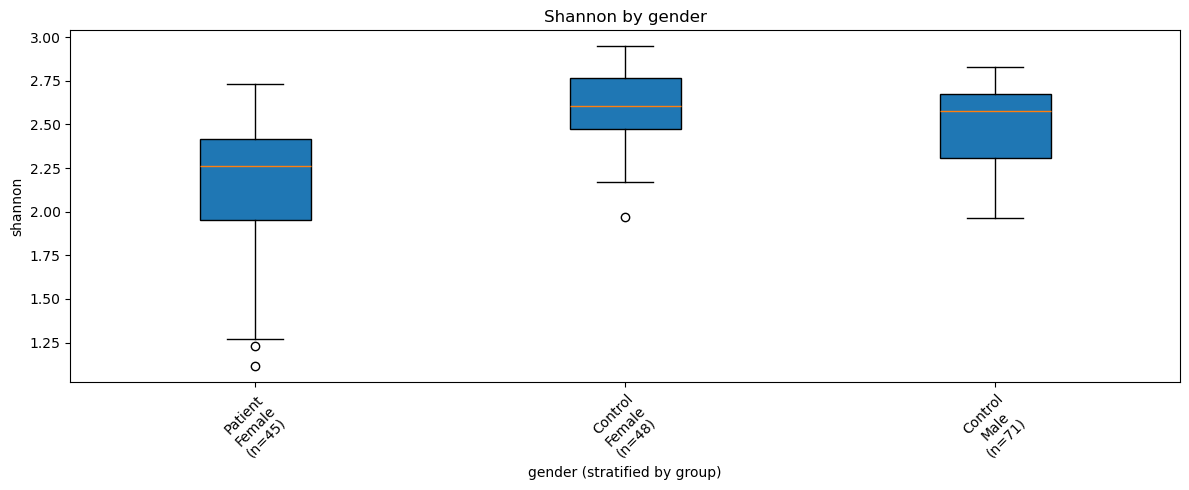

C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\1179939182.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels, patch_artist=True)


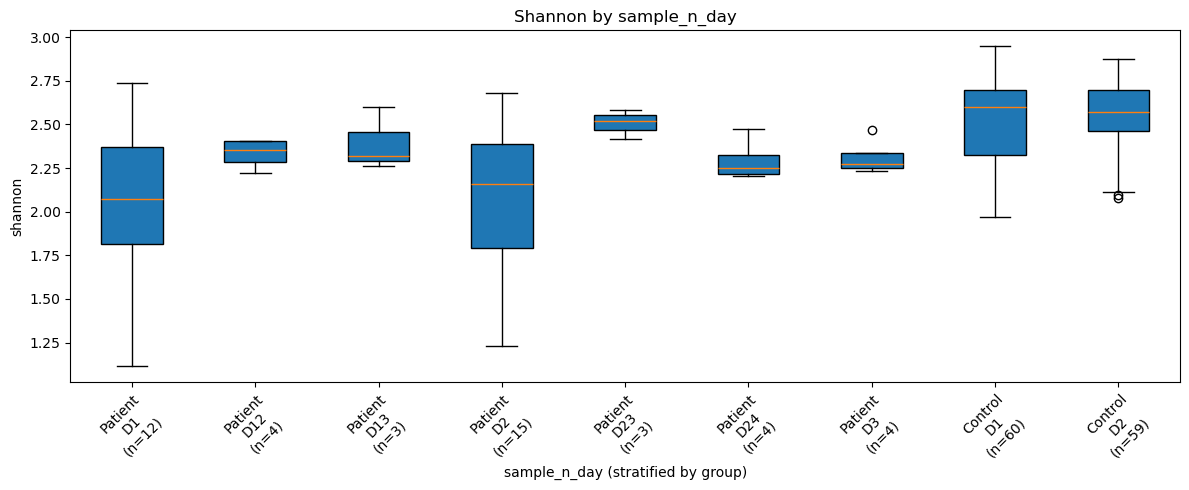

C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\1179939182.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels, patch_artist=True)


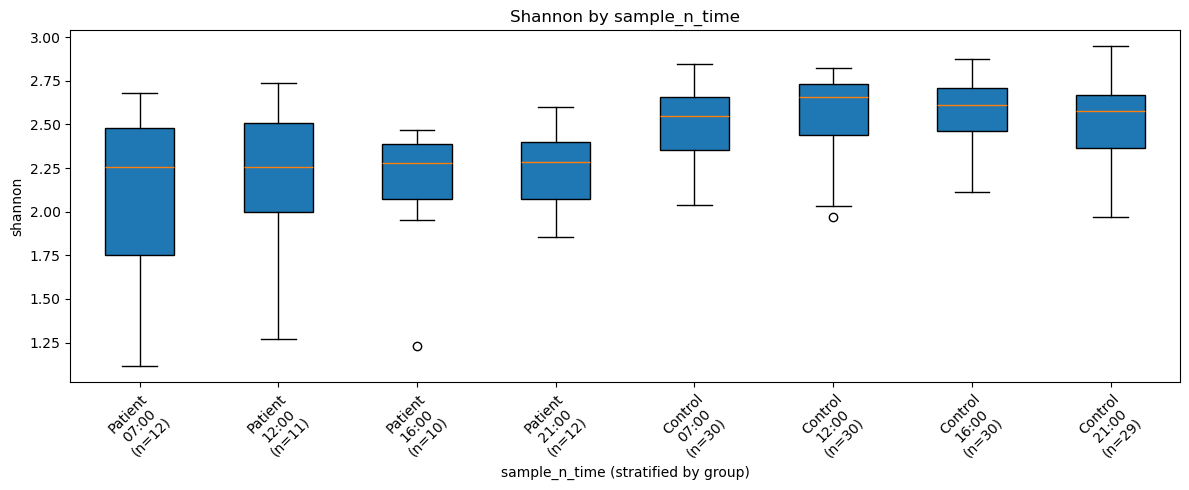

C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\1179939182.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels, patch_artist=True)


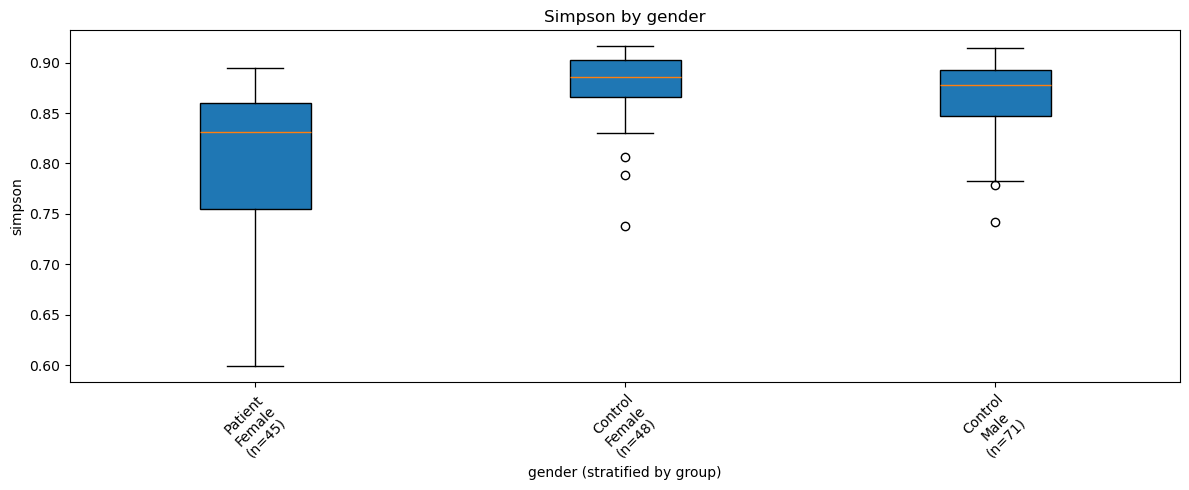

C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\1179939182.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels, patch_artist=True)


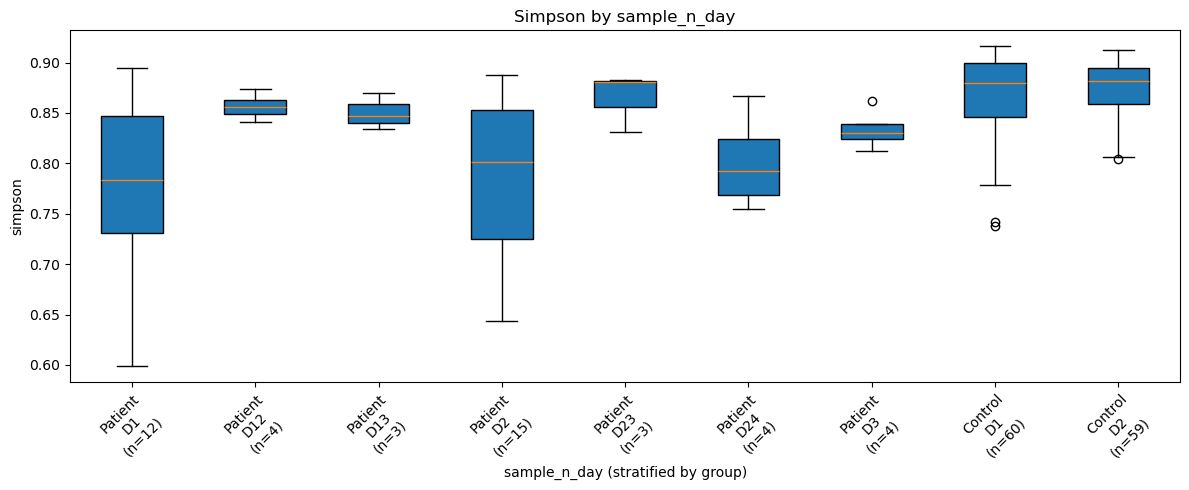

C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\1179939182.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels, patch_artist=True)


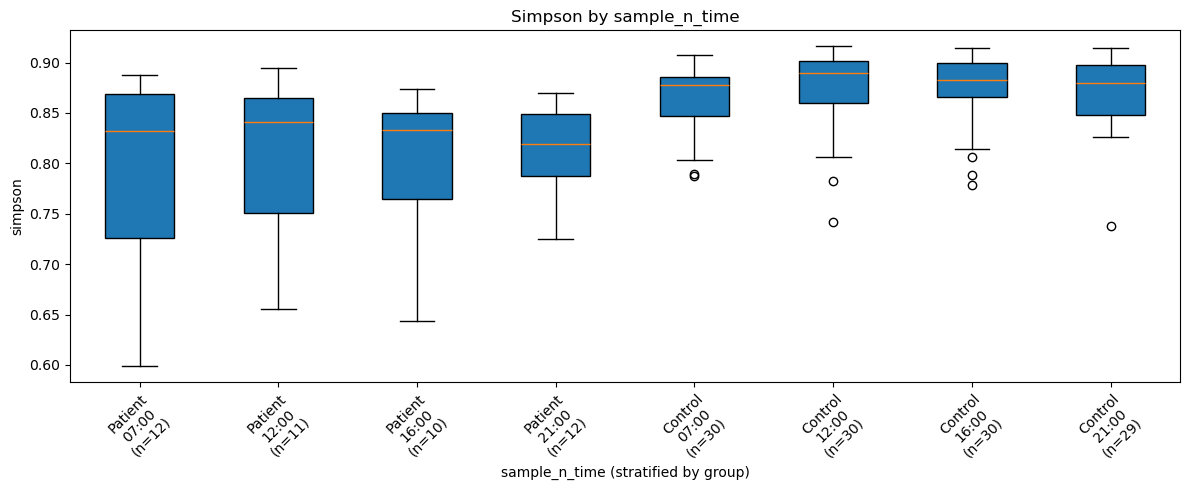

C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\1179939182.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels, patch_artist=True)


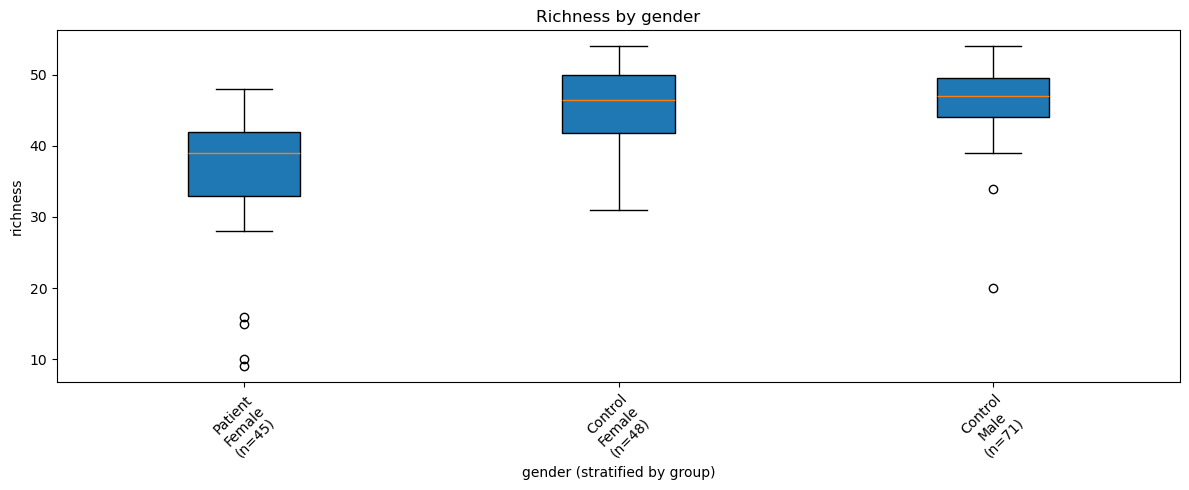

C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\1179939182.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels, patch_artist=True)


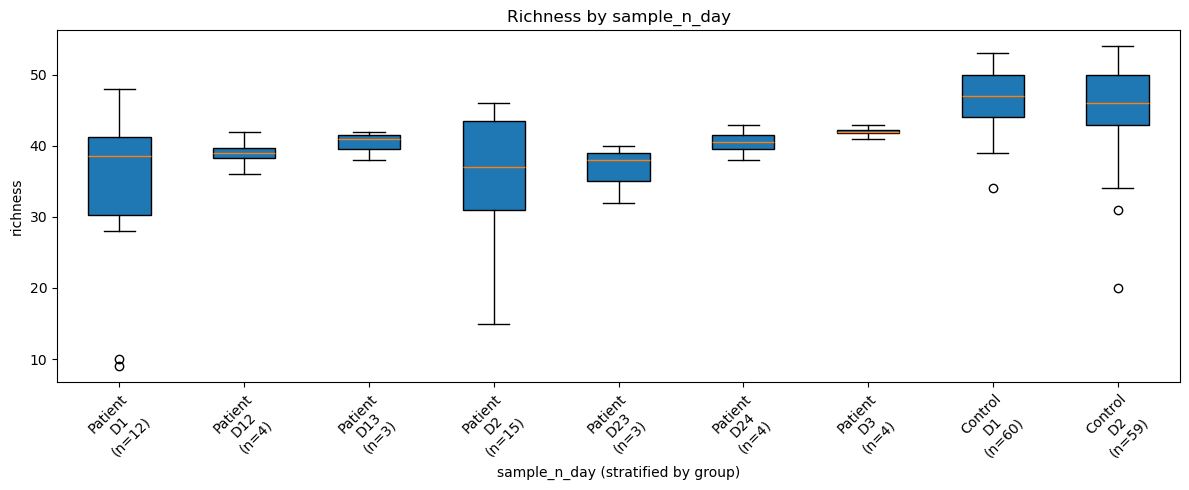

C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\1179939182.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels, patch_artist=True)


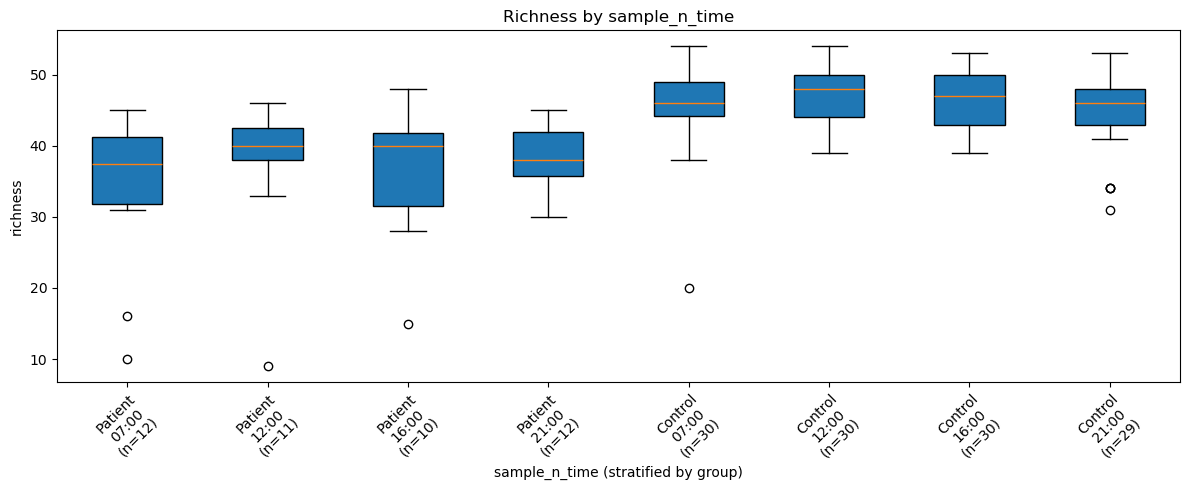

In [12]:
# Compute Shannon, Simpson, and Richness to quantify how diverse each microbiome sample is
def compute_alpha_diversity(df, metric_cols):
    counts = df[metric_cols].values # 2D numpy array of genus abundance

    shannon_vals = [shannon(row) if row.sum() > 0 else np.nan for row in counts]
    simpson_vals = [simpson(row) if row.sum() > 0 else np.nan for row in counts]
    richness_vals = (df[metric_cols] > 0).sum(axis=1)

    df_out = df.copy()
    df_out["shannon"] = shannon_vals # Higher values, higher diversity
    df_out["simpson"] = simpson_vals # Lower values, more diversity? Still trying to figure it out :D
    df_out["richness"] = richness_vals # How many genera have non-zero abundance

    return df_out

# Attach group label and call compute_alpha_diversity
def attach_alpha_metrics(df_group, label, metric_cols):
    df_out = compute_alpha_diversity(df_group, metric_cols)
    df_out["group"] = label
    return df_out

# Run for both groups
df_patients_alpha = attach_alpha_metrics(df_patients, "Patient", abundance_cols)
df_controls_alpha = attach_alpha_metrics(df_controls, "Control", abundance_cols)

# Combine
df_alpha = pd.concat([df_patients_alpha, df_controls_alpha], ignore_index=True)

# Faceting = breaking down data into subgroups based on category and visualizing each subgroup separately
# Defines a reusable function to plot a given diversity metric (like "shannon") by a faceting variable (like "gender").
def plot_alpha_by_facet(df_alpha, metric, facet):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(figsize=(12, 5))

    labels = []
    data = []

    if facet == "sample_n_time": # Special handling of time column to ensure that facet levels appear in logical orders
        df_alpha["_facet_tmp"] = pd.to_datetime(df_alpha[facet], format="%H:%M").dt.time
        facet_order = sorted(df_alpha[facet].unique(), key=lambda x: pd.to_datetime(x, format="%H:%M"))
    else:
        facet_order = sorted(df_alpha[facet].dropna().unique())

    # This creates a subset of the data for each combination of group "Patient or Control" and level "Female, Day1, etc"
    for group in df_alpha["group"].unique():
        for level in facet_order:
            subset = df_alpha[(df_alpha["group"] == group) & (df_alpha[facet] == level)]
            if not subset.empty: #Adds metric data to "data" and build label like "Patient\nFemale\n(n=10)"
                data.append(subset[metric])
                n = subset.shape[0]
                labels.append(f"{group}\n{level}\n(n={n})")

    ax.boxplot(data, labels=labels, patch_artist=True)
    ax.set_title(f"{metric.capitalize()} by {facet}")
    ax.set_ylabel(metric)
    ax.set_xlabel(f"{facet} (stratified by group)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    if facet == "sample_n_time":
        df_alpha.drop(columns=["_facet_tmp"], inplace=True, errors="ignore")




plot_alpha_by_facet(df_alpha, "shannon", "gender")
plot_alpha_by_facet(df_alpha, "shannon", "sample_n_day")
plot_alpha_by_facet(df_alpha, "shannon", "sample_n_time")

plot_alpha_by_facet(df_alpha, "simpson", "gender")
plot_alpha_by_facet(df_alpha, "simpson", "sample_n_day")
plot_alpha_by_facet(df_alpha, "simpson", "sample_n_time")

plot_alpha_by_facet(df_alpha, "richness", "gender")
plot_alpha_by_facet(df_alpha, "richness", "sample_n_day")
plot_alpha_by_facet(df_alpha, "richness", "sample_n_time")


In [11]:
print("Unique days:", df_alpha["sample_n_day"].unique())
print("Counts per group + day:")
print(df_alpha.groupby(["group", "sample_n_day"]).size())


Unique days: ['D1' 'D2' 'D3' 'D12' 'D13' 'D23' 'D24']
Counts per group + day:
group    sample_n_day
Control  D1              60
         D2              59
Patient  D1              12
         D12              4
         D13              3
         D2              15
         D23              3
         D24              4
         D3               4
dtype: int64


### Find the full results in the generated excel sheet

#### 1. Shannon Diversity Index

Control Group


- Shannon values remain stable across the day (~2.5–2.56), indicating consistent microbial diversity.

- The lowest mean is at 07:00 (2.50), slightly increasing by 12:00 (2.56), then remains stable.

- Standard deviation (SD ~0.22–0.24) suggests low variability among individuals.

Patient Group


- Patients consistently show lower Shannon diversity than controls at all time points.

- Means range from 2.08 (07:00) to 2.22 (21:00), with a slight increase over time.

- Variability is higher in the morning (SD = 0.52 at 07:00) and becomes tighter by 21:00 (SD = 0.24)



#### 2. Simpson Diversity Index


Control Group


- Simpson values are very high and stable (~0.86–0.87).

- Very low variation across all timepoints (SD ~0.035–0.043).

Patient Group


- Lower and more variable Simpson values than controls (~0.79–0.81).

- The lowest at 07:00 (0.79), rising slightly by 21:00 (0.81).

- Higher variability among patients (SD = 0.097 at 07:00), especially early in the day.



#### 3. Richness

Control Group


- Richness is consistently high across all timepoints (~45–47).

- Slight dip at 21:00 (mean = 44.7).

- Low variability (SD ~4–6), with most individuals ranging from 43 to 54 species.

Patient Group


- Richness is markedly lower than controls: ~34–38.

- Lowest richness in the morning (mean = 33.9), increasing modestly through the day.

- Greater inter-individual variability, especially at 07:00 and 12:00 (SD >10).

- 07:00 minimum = 10, showing extreme cases of severely reduced diversity.




In [15]:
def print_alpha_summary(df_alpha, metric, stratify_by):
    print(f"\n=== {metric.capitalize()} by {stratify_by} and Group ===")
    summary = df_alpha.groupby(["group", stratify_by])[metric].describe()
    print(summary)

# Run for all combinations
for metric in ["shannon", "simpson", "richness"]:
    for facet in ["gender", "sample_n_day", "sample_n_time"]:
        print_alpha_summary(df_alpha, metric, facet)

# Store all summaries in one Excel file
with pd.ExcelWriter("alpha_diversity_summaries.xlsx") as writer:
    for metric in ["shannon", "simpson", "richness"]:
        for facet in ["gender", "sample_n_day", "sample_n_time"]:
            summary = df_alpha.groupby(["group", facet])[metric].describe()
            sheet_name = f"{metric}_{facet}"[:31]  # Excel sheet name limit
            summary.to_excel(writer, sheet_name=sheet_name)



=== Shannon by gender and Group ===
                count      mean       std       min       25%       50%  \
group   gender                                                            
Control Female   48.0  2.590901  0.210722  1.971841  2.472838  2.605467   
        Male     71.0  2.494940  0.234305  1.966738  2.305601  2.577248   
Patient Female   45.0  2.165089  0.395017  1.114501  1.949868  2.262667   

                     75%       max  
group   gender                      
Control Female  2.764188  2.947344  
        Male    2.673595  2.829325  
Patient Female  2.416664  2.734322  

=== Shannon by sample_n_day and Group ===
                      count      mean       std       min       25%       50%  \
group   sample_n_day                                                            
Control D1             60.0  2.519338  0.251897  1.966738  2.326434  2.601155   
        D2             59.0  2.548198  0.204483  2.078826  2.460536  2.570607   
Patient D1             12.0  2.0280

### Shannon Index


1. Temporal Trends
- Control group: Relatively stable over time. Mean Shannon scores slightly increase until 12:00, plateau at 16:00, then dip slightly at 21:00. Very small variability, reflected by narrow SD belts.
- Patient group: More variability and fluctuation over time. Mean trend shows a slight U-shape: a dip around 12:00–16:00 and a small rebound at 21:00. Wider SD error bars indicate greater individual variation.
-  Between-Individual Variation: Some Patient lines start very low (~1.2–1.3), indicating highly uneven or low-diversity samples. n contrast, Control individuals cluster tightly around the 2.5–2.8 range, even across time, suggesting more evenly distributed and diverse communities.



2. Heatmap

- Control group: Uniformly High Diversity: Most control participants consistently show high Shannon index values (≈2.5–2.8), reflected by yellow and light green tones across all time points. Minimal Temporal Fluctuation For each control individual across carious timepoints.
- Control group inter-individual variations: C, D, L, I, J show slightly lower Shannon indices compared to others like B, M, N, but still within a relatively tight high range. N (Control) has consistently among the highest diversity values at all timepoints.


### Simpson Diversity Index

1. Overall Time-Series Plot with Group Trend (LOWESS + Mean ± SD)
- General Pattern: Controls exhibit consistently higher Simpson diversity values compared to Patients across all time points. The LOWESS curve for Controls stays elevated above that of Patients, indicating greater evenness and dominance stability. Controls maintain values mostly between 0.87 and 0.91, while Patients show more fluctuation between 0.70 and 0.88.
- Temporal Dynamics: Patients show a slight upward trend in Simpson diversity over the day. Control diversity is remarkably stable.
- Inter-individual Variation: Control SD is tighter, implying more homogeneity.


2. Facet Grid: Individual Participant Time Series
- Control Participants: Most controls (e.g., B, E, G, M) show minimal change over time, reinforcing their group stability. Some variation (e.g., in D, I, L) exists but remains within high Simpson values (>0.85). 
- Patient Groups: Patient curves are more irregular, supporting greater intra-group diversity.

3. Heatmap: Simpson Index by Person and Time
- Group-Level Contrast: Control rows are predominantly yellow-green, indicating consistently high Simpson index. Patient rows are more blue-green, especially in early timepoints, highlighting lower evenness.
- Temporal Trend: Several Patients (notably P, Q) exhibit progressive shifts from cooler to warmer tones (i.e., increasing Simpson values) across time. Control participants maintain stable warm tones (consistent high diversity).
- Outliers: P (Patient) stands out with the lowest baseline diversity (deep blue at 07:00), gradually increasing across time.


### Richness

1. Lineplot: Controls generally maintain higher richness throughout the day (LOWESS line ~45–50), indicating more taxonomic diversity. Patients consistently show lower richness (LOWESS line ~35–40), and greater variability. Variance is more pronounced in the Patient group, evidenced by the larger standard deviation belts. There is no clear temporal pattern (i.e., consistent rise or fall) in either group, though some individual fluctuation is visible.

2. Faceted Line Plots by Person: Most Control individuals show moderate fluctuations within a high baseline (~45–55).  Several Patients exhibit larger swings (e.g., P drops to ~10–15 at some points). Some individuals (e.g., S or L) show more stable richness across timepoints, while others vary significantly. A few Patient samples show unusually low richness (e.g., <20), possibly due to sparse microbial communities or technical/sample inconsistencies.

3. Heatmap by Person: Control group rows are uniformly bright (yellows/greens), reaffirming high richness. Patients (bottom rows) show darker shades, particularly individual P, confirming consistently low richness. Temporal variability is visible but not systematic (e.g., some drop at 16:00, others rise). This reinforces the inter-individual variability in richness, especially in patients.

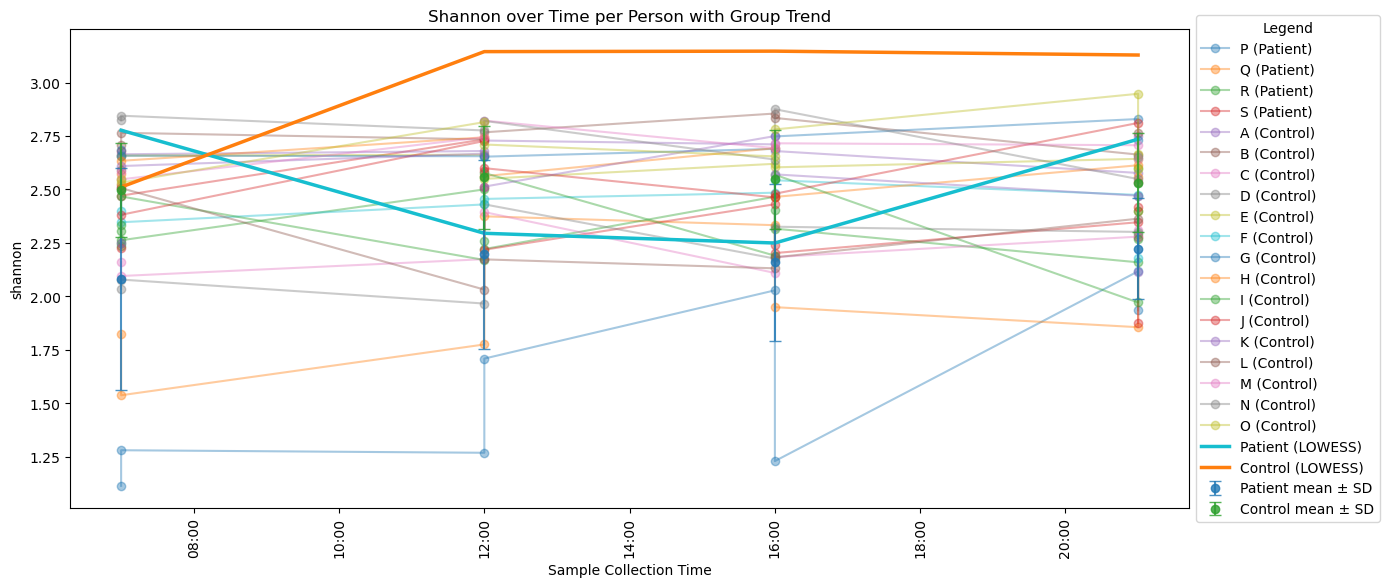

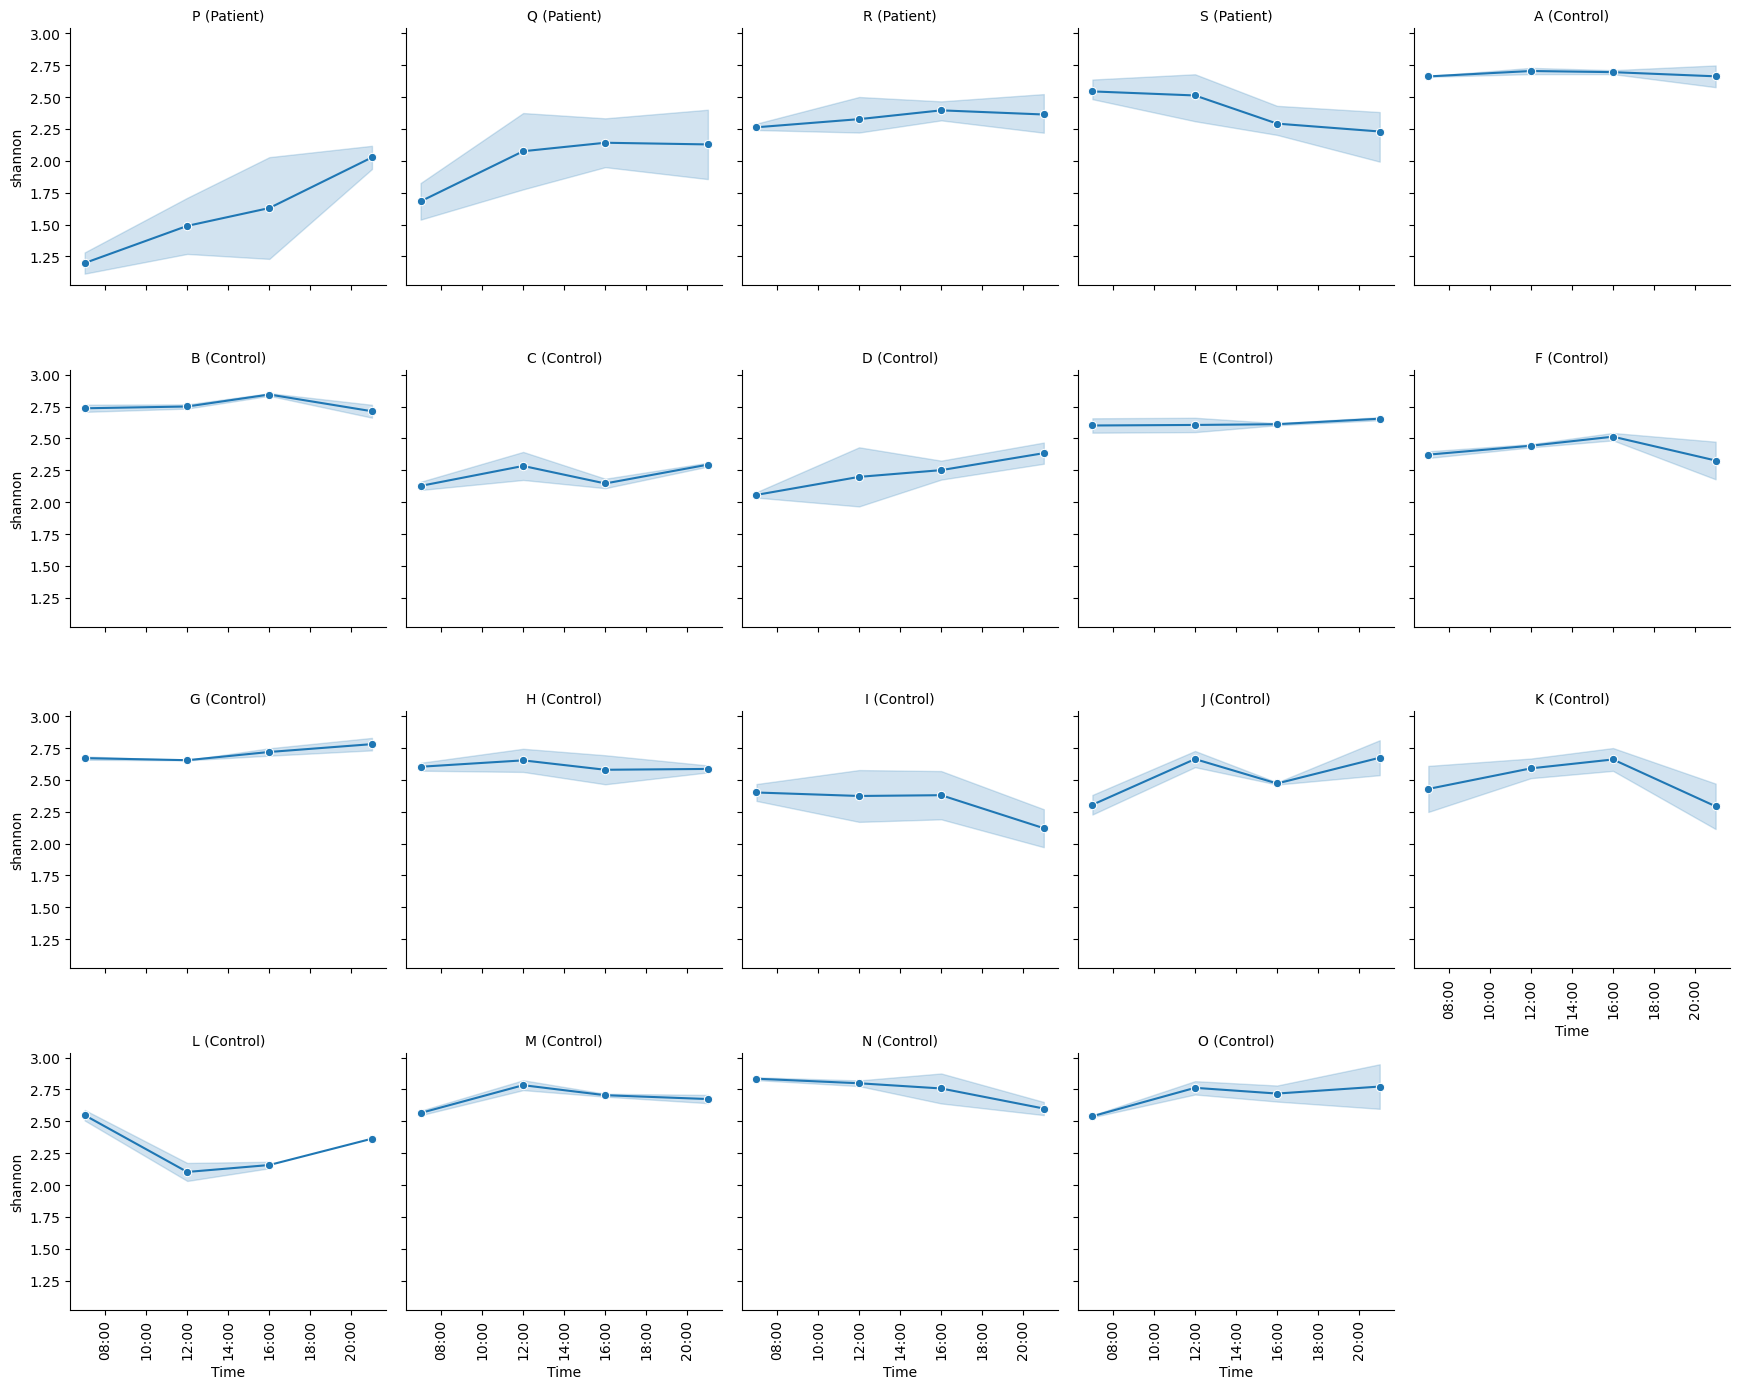

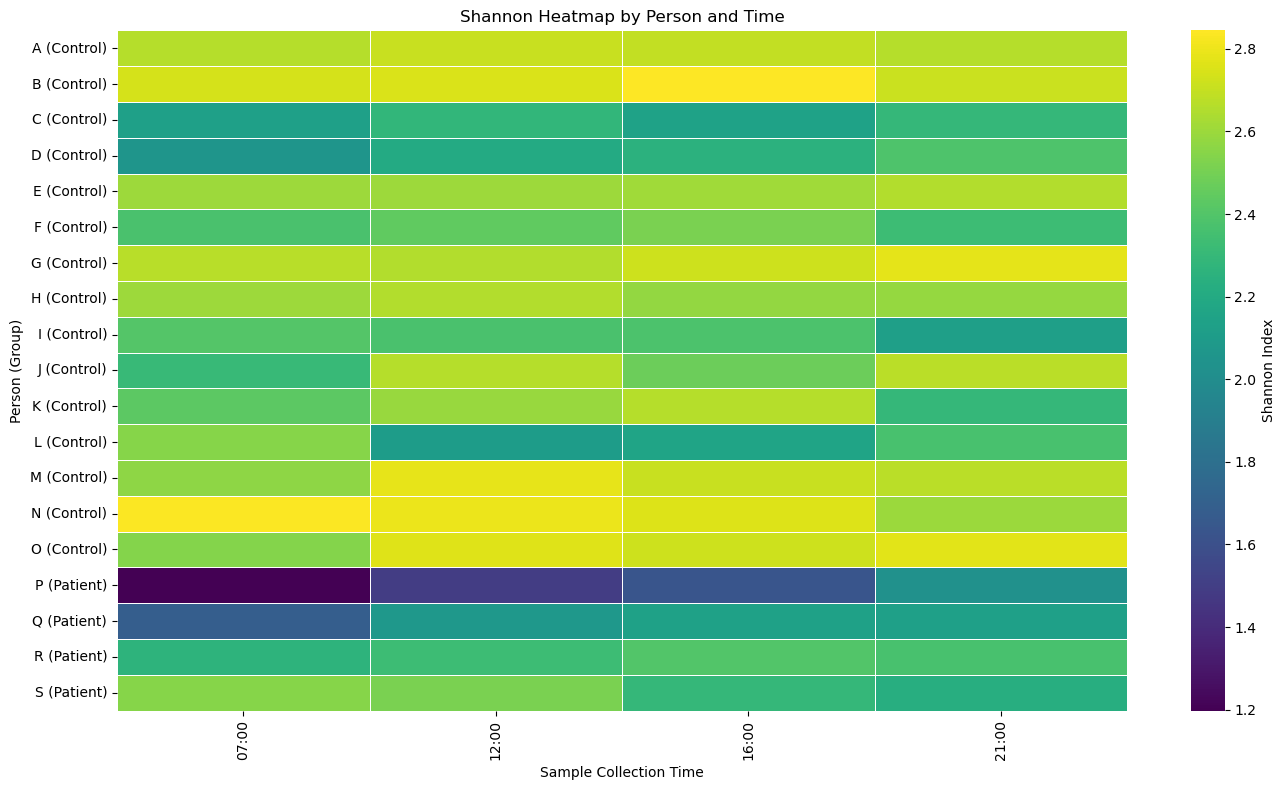

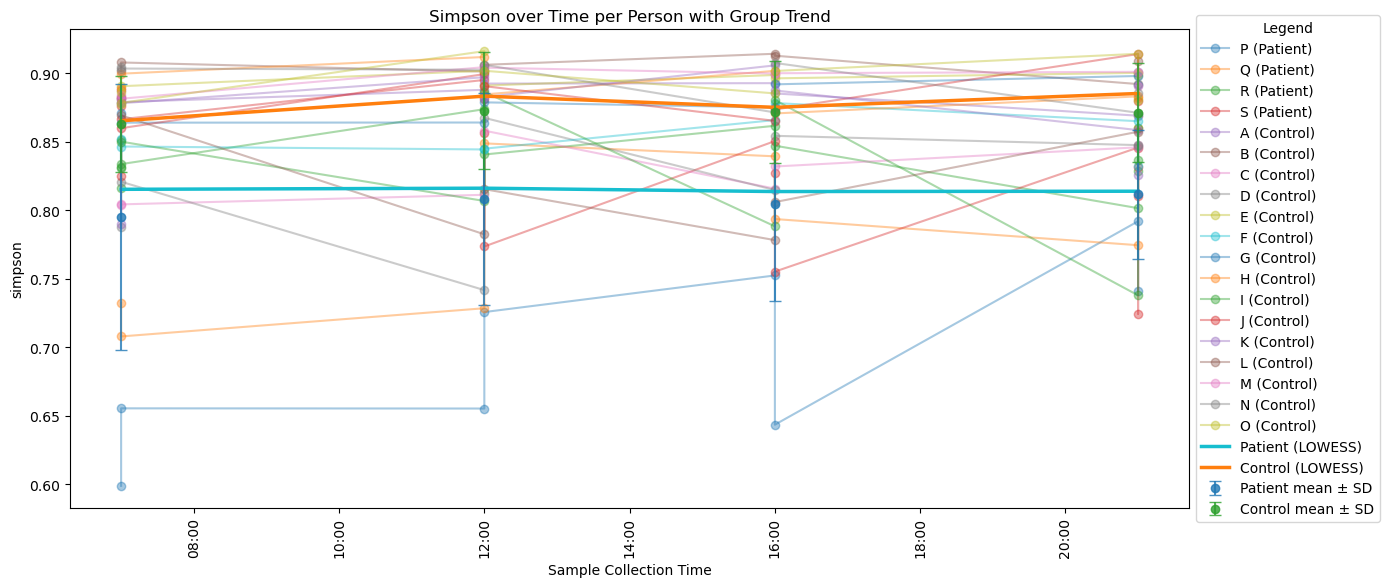

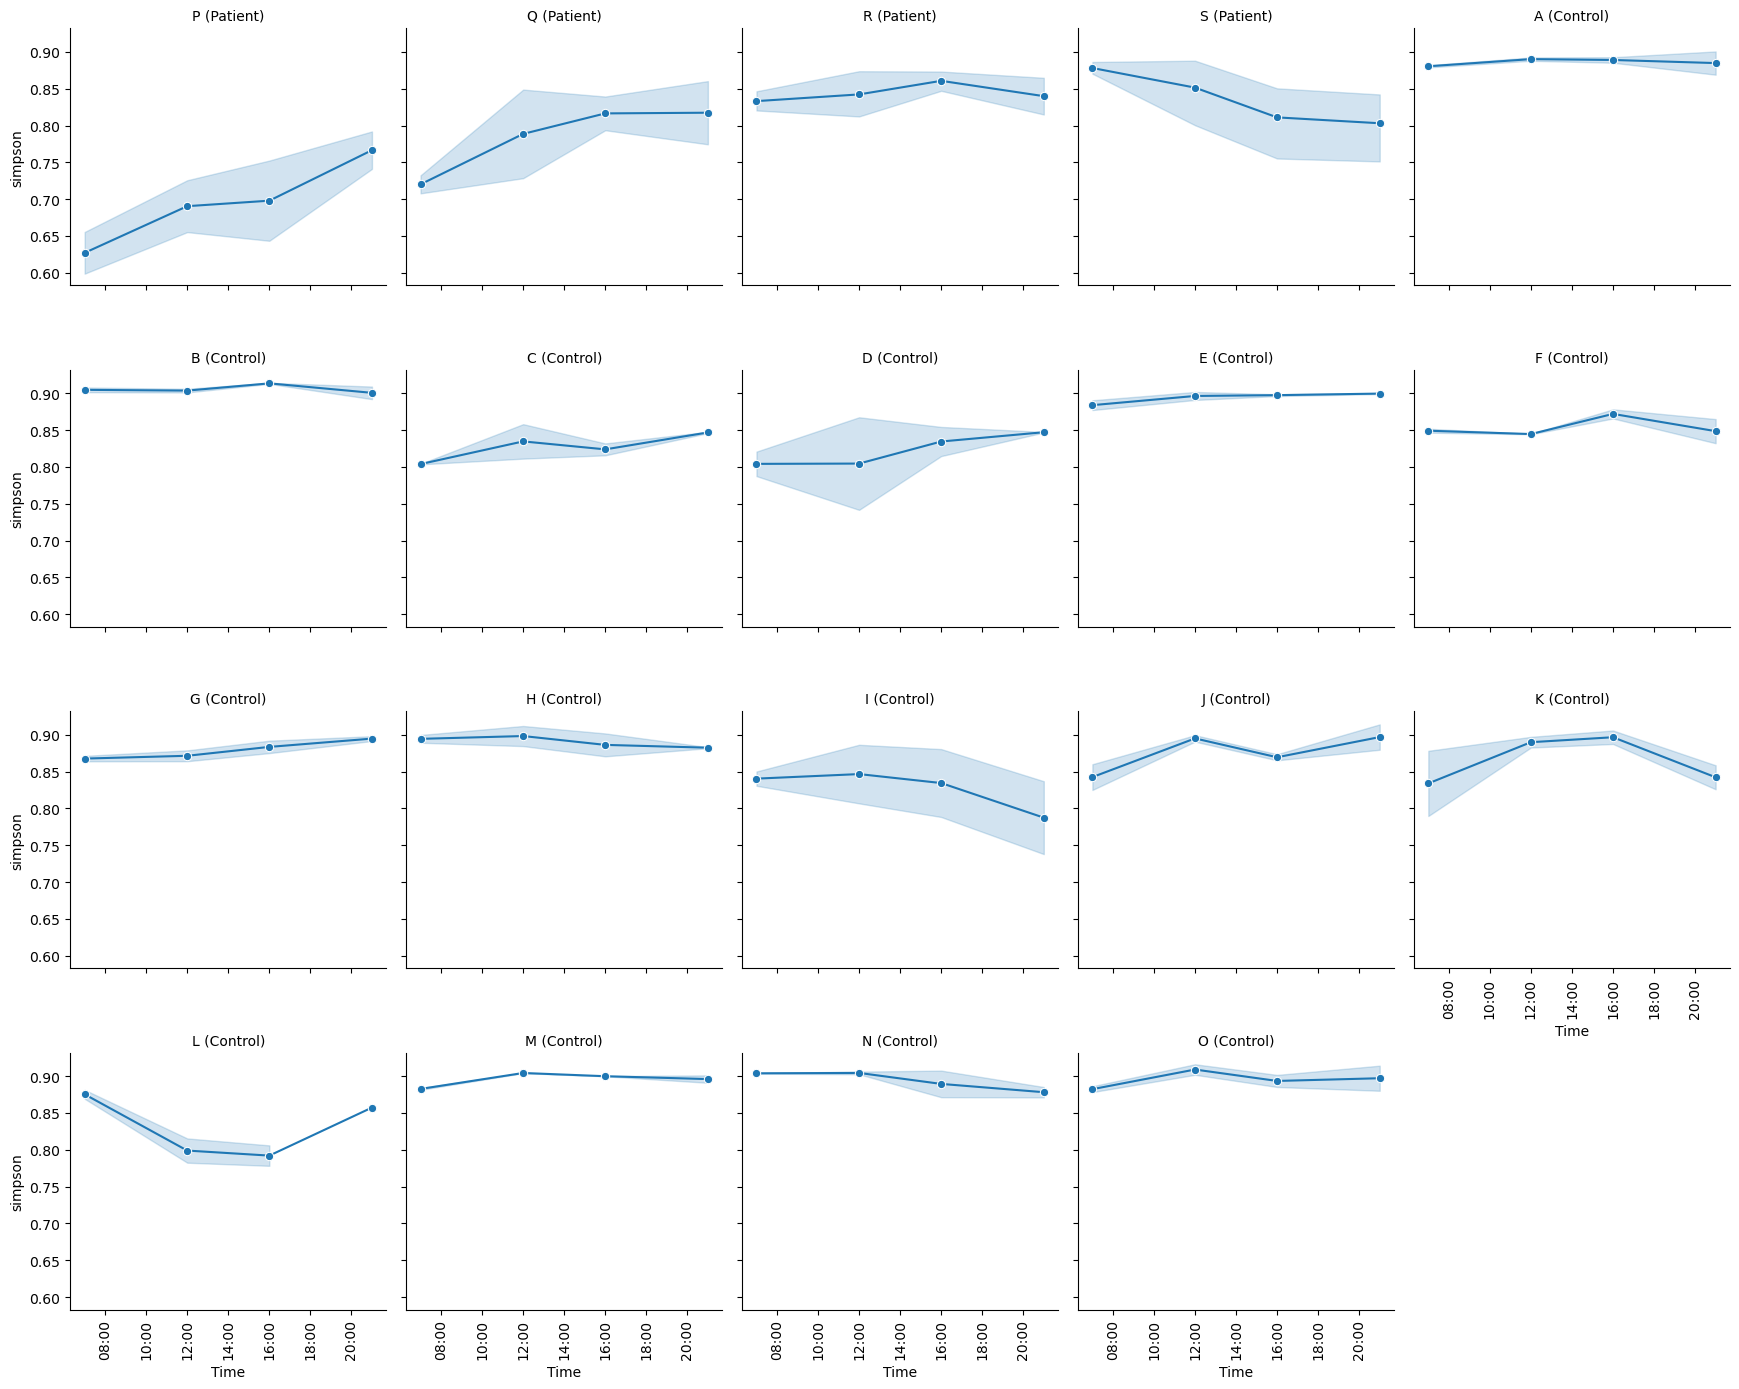

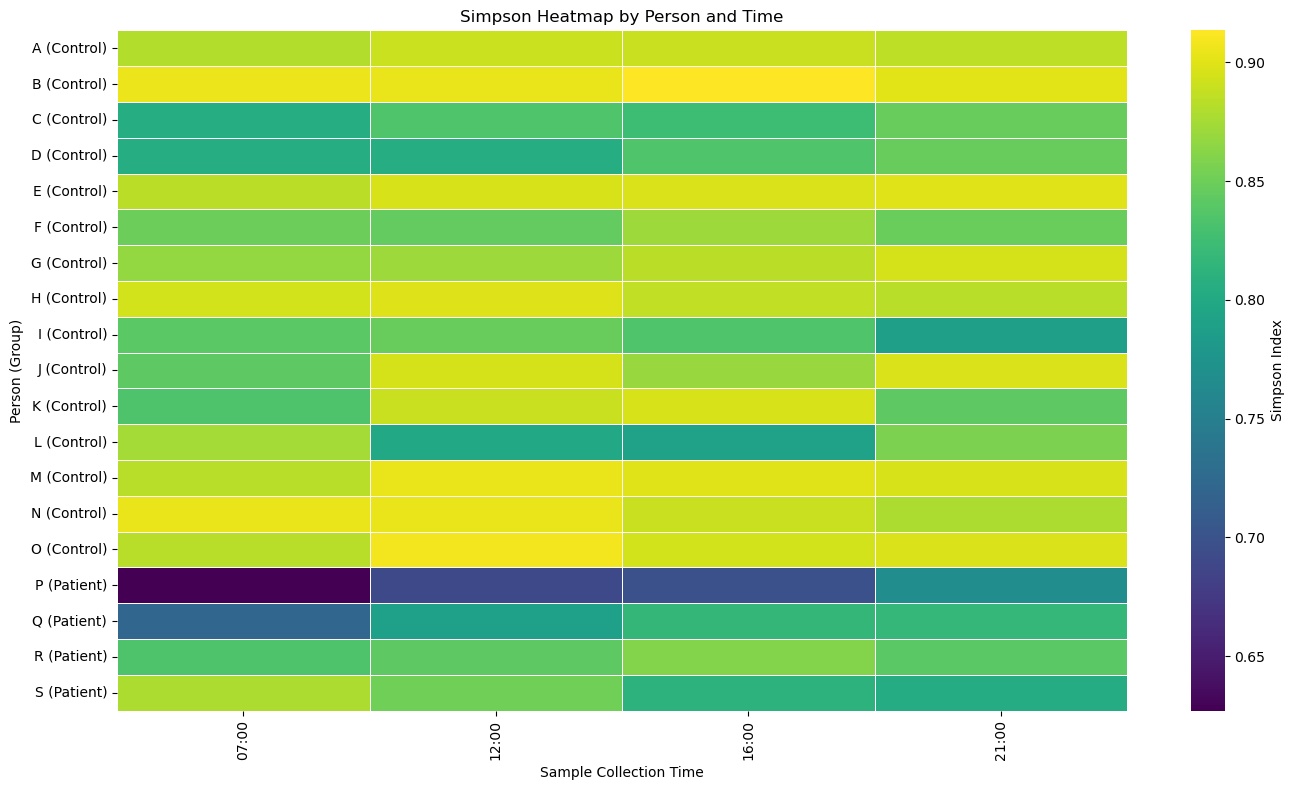

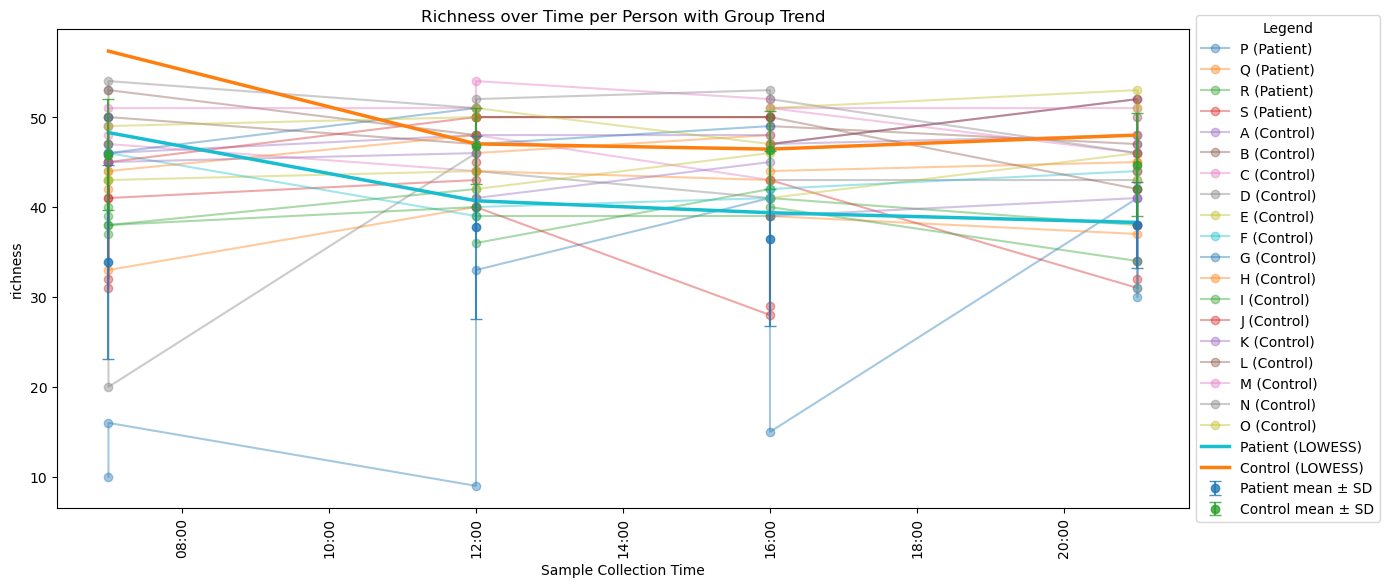

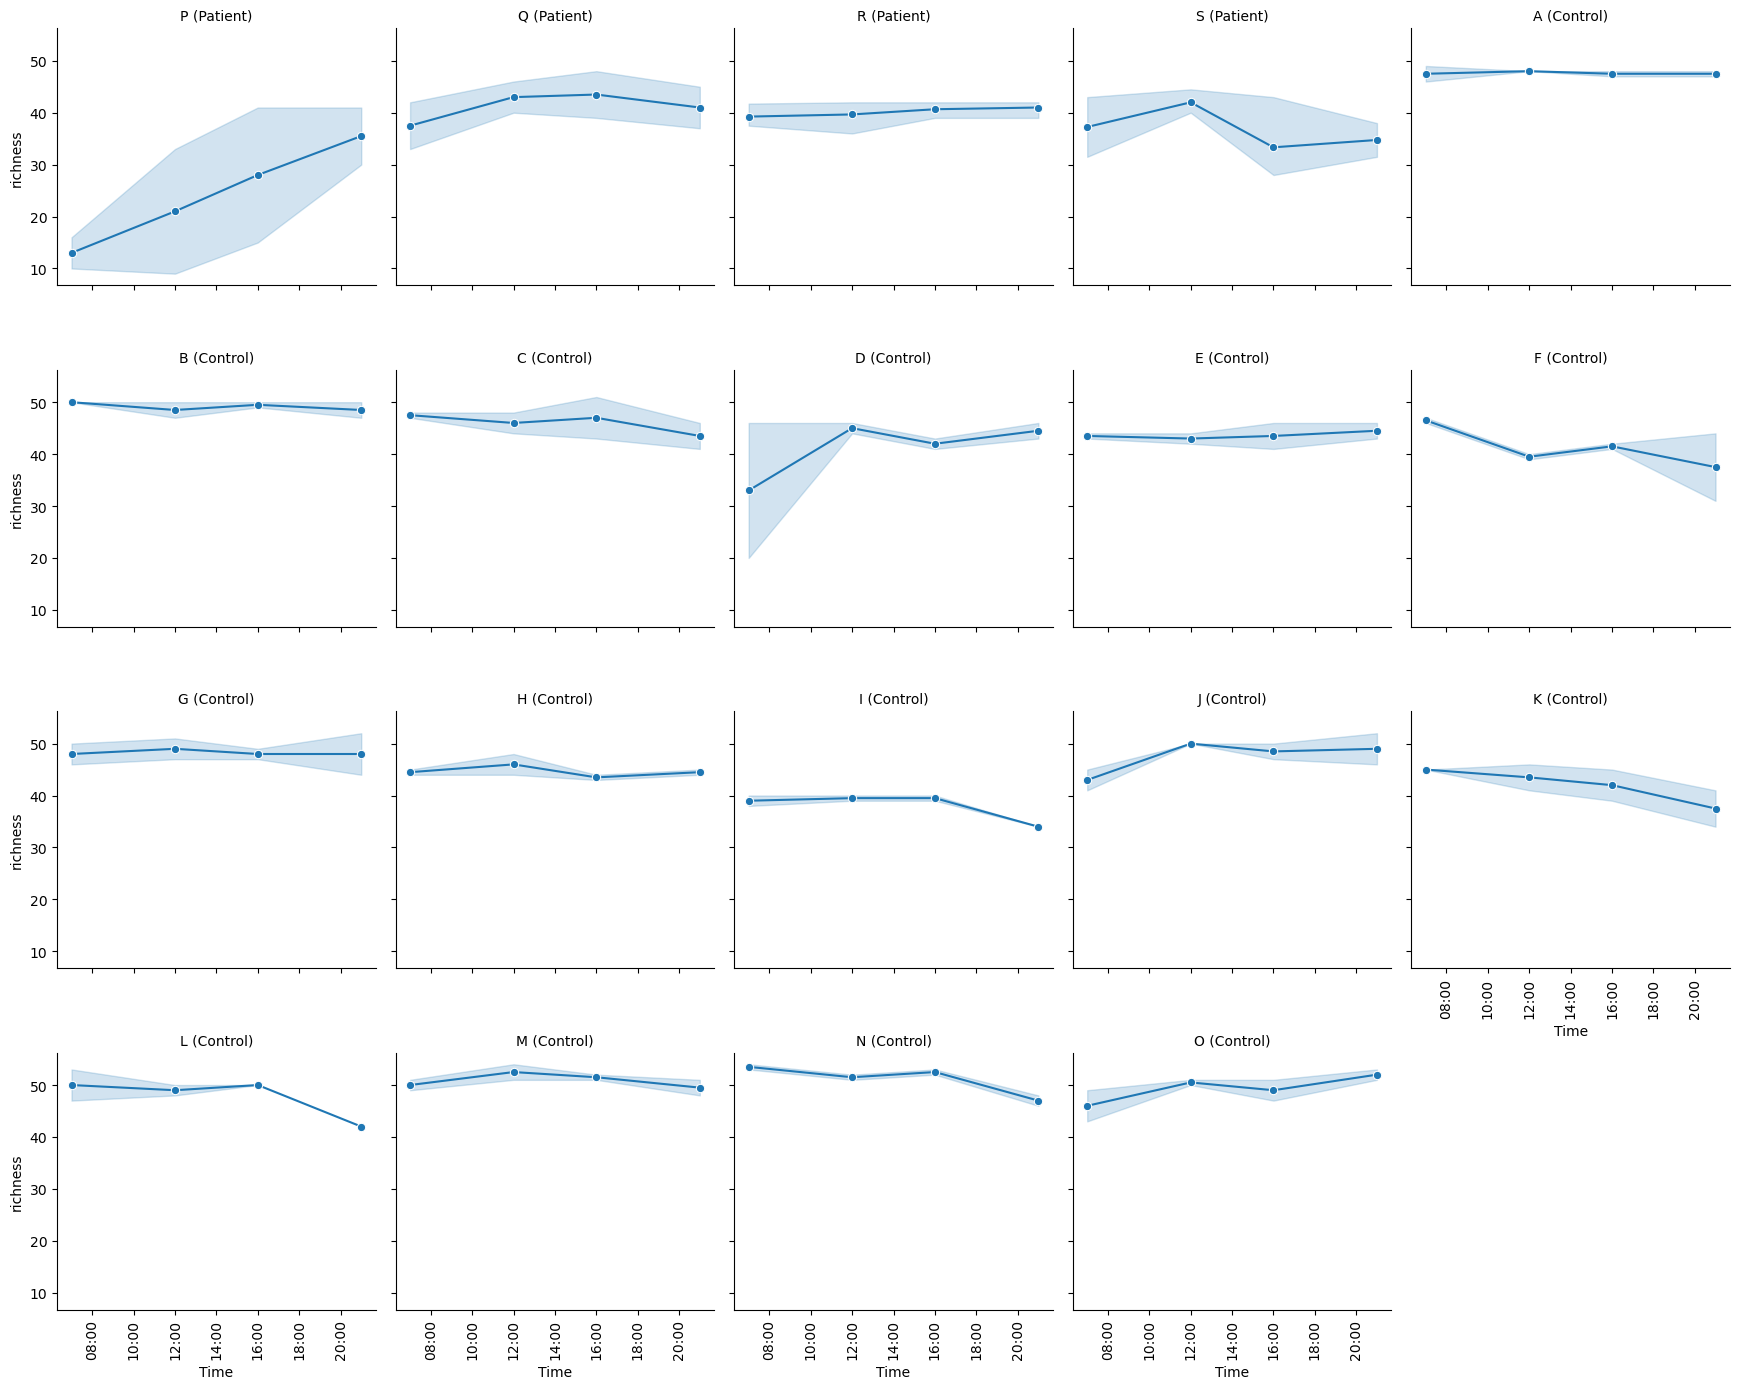

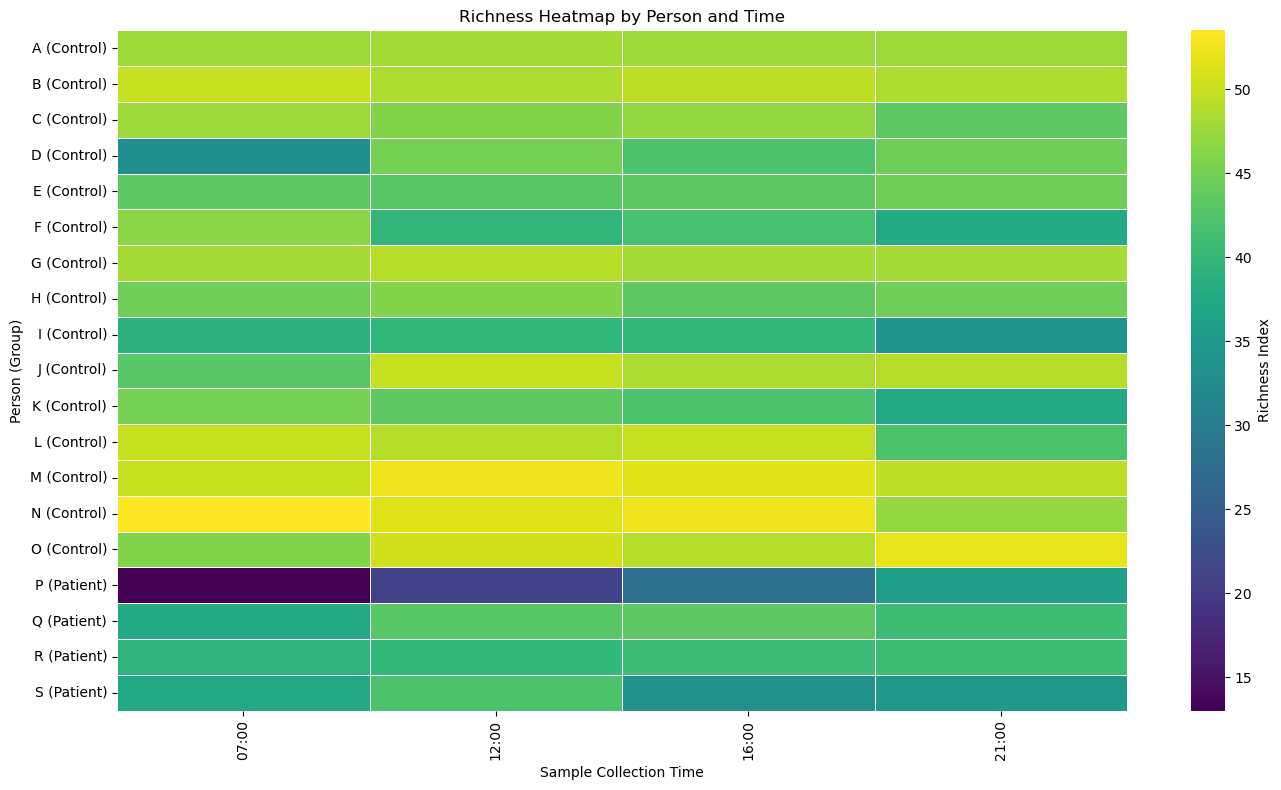

In [22]:
# Add composite label for person + group
df_alpha["person_group"] = df_alpha["person"].astype(str) + " (" + df_alpha["group"] + ")"

def plot_alpha_per_person_over_time(df_alpha, metric):
    fig, ax = plt.subplots(figsize=(14, 6))

    # Convert time to datetime for consistent formatting
    df_alpha["_time_dt"] = pd.to_datetime(df_alpha["sample_n_time"], format="%H:%M")

    for person_id in df_alpha["person_group"].unique():
        person_data = df_alpha[df_alpha["person_group"] == person_id].sort_values("_time_dt")
        if person_data.empty:
            continue
        ax.plot(person_data["_time_dt"], person_data[metric], marker="o", alpha=0.4, label=person_id)

    # LOWESS trend + Mean ± SD
    for group in df_alpha["group"].unique():
        group_data = df_alpha[df_alpha["group"] == group].dropna(subset=[metric])
        if not group_data.empty:
            sorted_group = group_data.sort_values("_time_dt")
            x = sorted_group["_time_dt"].astype(np.int64) // 10**9
            y = sorted_group[metric]
            smoothed = lowess(y, x, frac=0.5)
            ax.plot(pd.to_datetime(smoothed[:, 0], unit='s'), smoothed[:, 1],
                    label=f"{group} (LOWESS)", linewidth=2.5)

            summary = group_data.groupby("_time_dt")[metric].agg(['mean', 'std']).reset_index()
            ax.errorbar(summary["_time_dt"], summary["mean"], yerr=summary["std"],
                        fmt='o', capsize=4, label=f"{group} mean ± SD", alpha=0.8)

    ax.set_title(f"{metric.capitalize()} over Time per Person with Group Trend")
    ax.set_xlabel("Sample Collection Time")
    ax.set_ylabel(metric)
    ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))
    plt.xticks(rotation=90)
    ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), title="Legend")
    plt.tight_layout()
    plt.show()

    df_alpha.drop(columns=["_time_dt"], inplace=True, errors="ignore")

def plot_facet_grid(df_alpha, metric):
    df_alpha["sample_datetime"] = pd.to_datetime(df_alpha["sample_n_time"], format="%H:%M")
    g = sns.FacetGrid(df_alpha, col="person_group", col_wrap=5, height=3.5, sharey=True)
    g.map_dataframe(sns.lineplot, x="sample_datetime", y=metric, marker="o")
    g.set_titles("{col_name}")
    g.set_axis_labels("Time", metric)
    for ax in g.axes.flatten():
        ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))
        ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    df_alpha.drop(columns=["sample_datetime"], inplace=True, errors="ignore")

def plot_heatmap(df_alpha, metric):
    df_alpha["sample_time_str"] = pd.to_datetime(df_alpha["sample_n_time"], format="%H:%M").dt.strftime("%H:%M")
    pivot = df_alpha.pivot_table(index="person_group", columns="sample_time_str", values=metric)
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot, cmap="viridis", cbar_kws={"label": f"{metric.capitalize()} Index"}, linewidths=0.5)
    plt.title(f"{metric.capitalize()} Heatmap by Person and Time")
    plt.xlabel("Sample Collection Time")
    plt.ylabel("Person (Group)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    df_alpha.drop(columns=["sample_datetime"], inplace=True, errors="ignore")

# Run for each metric
for metric in ["shannon", "simpson", "richness"]:
    plot_alpha_per_person_over_time(df_alpha, metric)
    plot_facet_grid(df_alpha, metric)
    plot_heatmap(df_alpha, metric)

 ### Between-Group Temporal Analysis Comparisons: Mann–Whitney U Test
 The Mann–Whitney U test (also called the Wilcoxon rank-sum test) is a non-parametric statistical test used to determine whether two independent groups differ significantly in their central tendencies (usually medians). This tests whether each of shannon, simpson or richness change over time within each group. 

 How it works: Instead of comparing group means (like the t-test), it:
1. Ranks all values from both groups together (from lowest to highest).
2. Computes the sum of ranks for each group.
3. Calculates a U statistic, which reflects how different the two rank distributions are.

Used when shannon, richness and simpson data may not be normally distributed, could have outliers or unequal variances between groups and when sample sizes are not balanced.

#### Observations
 - No significant time-based variation in Shannon diversity within either group.
 - Despite individual variability, the average diversity in each group remains stable throughout the day.
 - Between Groups: Patients consistently have significantly lower Shannon diversity at all timepoints (p < 0.01).


Statistical comparison: Shannon | Test: mannwhitney
 Time  n_patients  n_controls  p_value
07:00          12          30 0.006098
12:00          11          30 0.007747
16:00          10          30 0.001523
21:00          12          29 0.001145

Kruskal–Wallis across time within each group:
Patient: H=0.187, p=0.9796
Control: H=2.305, p=0.5115


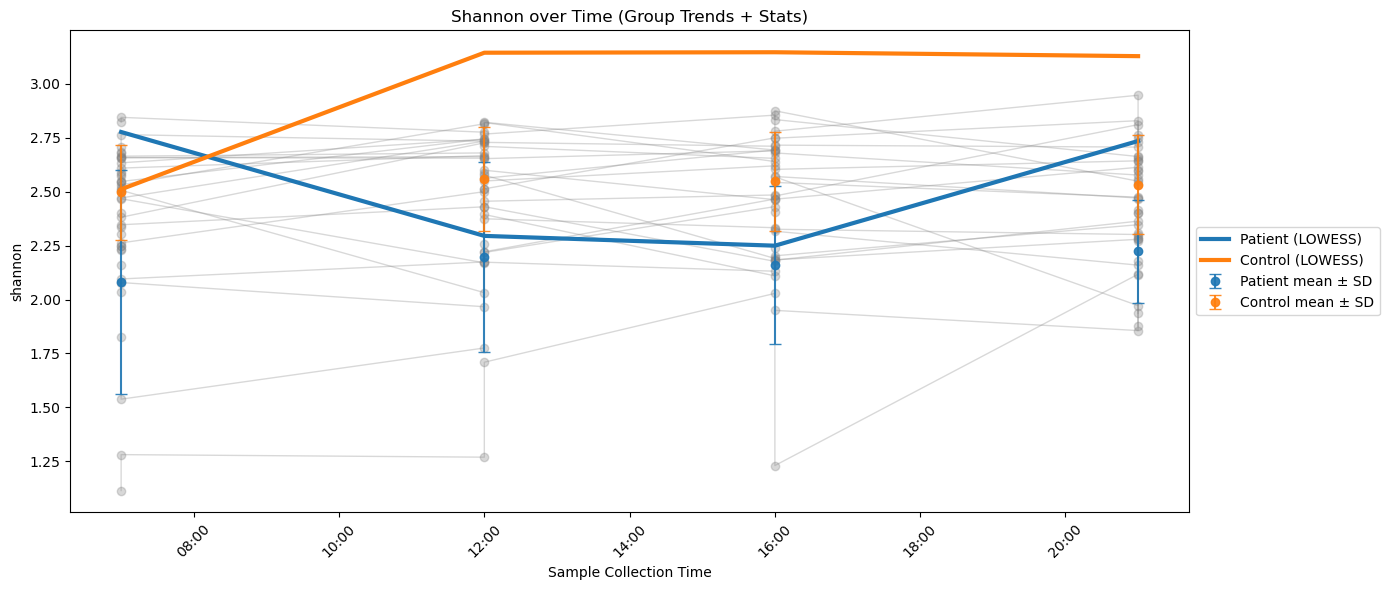


Statistical comparison: Simpson | Test: ttest
 Time  n_patients  n_controls  p_value
07:00          12          30 0.034829
12:00          11          30 0.021927
16:00          10          30 0.015277
21:00          12          29 0.001130

Kruskal–Wallis across time within each group:
Patient: H=0.271, p=0.9653
Control: H=3.535, p=0.3162


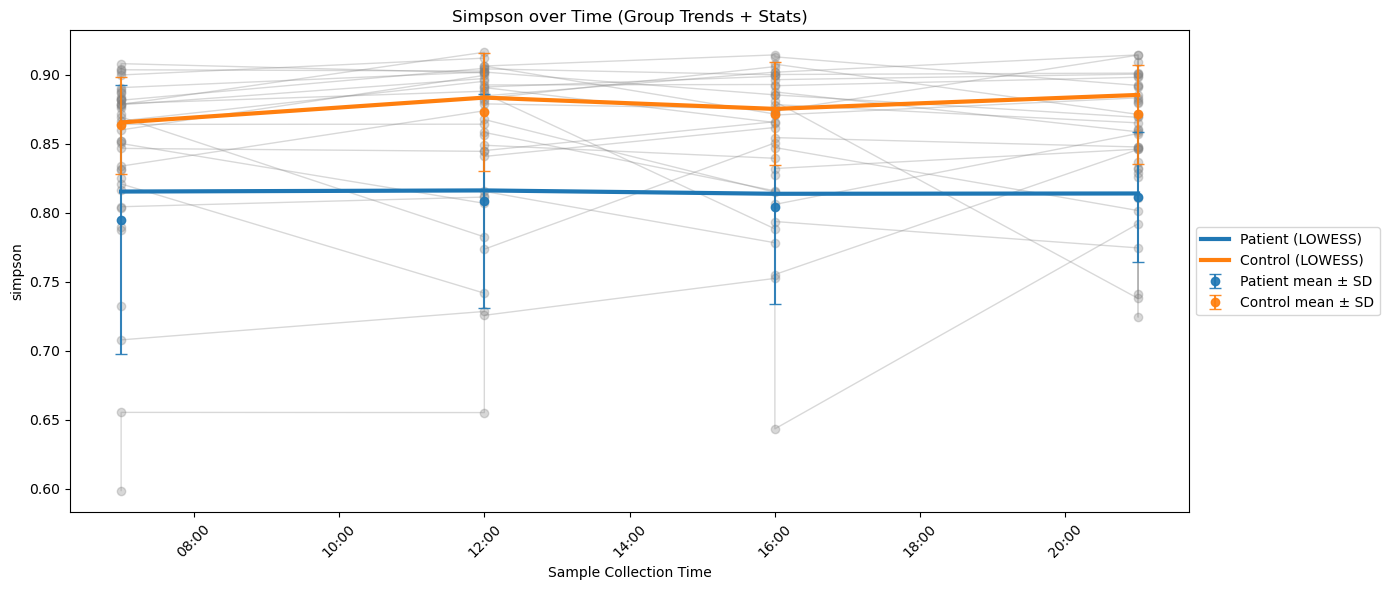


Statistical comparison: Richness | Test: mannwhitney
 Time  n_patients  n_controls  p_value
07:00          12          30 0.000030
12:00          11          30 0.000465
16:00          10          30 0.000895
21:00          12          29 0.000631

Kruskal–Wallis across time within each group:
Patient: H=1.488, p=0.6849
Control: H=1.786, p=0.6179


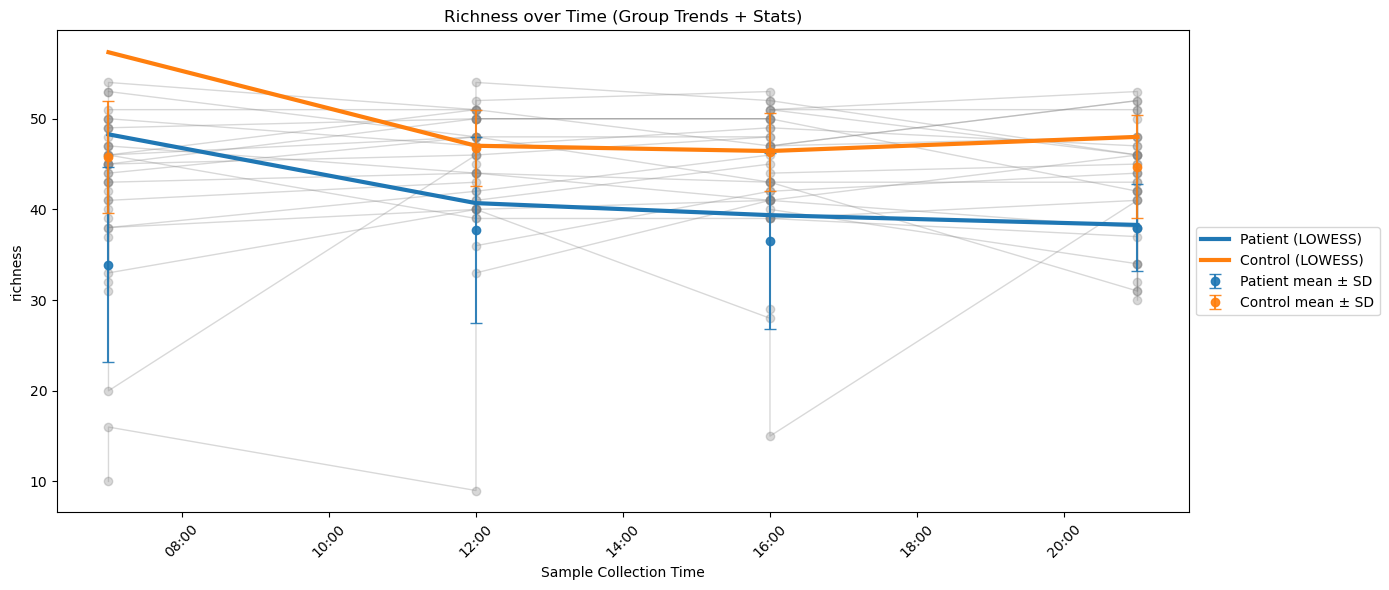

In [27]:

def plot_alpha_groupwise_with_stats(df_alpha, metric, test='mannwhitney'):
    fig, ax = plt.subplots(figsize=(14, 6))

    # Prepare time column
    df_alpha["_time_dt"] = pd.to_datetime(df_alpha["sample_n_time"], format="%H:%M")

    # 1–2. Plot individuals in gray
    for person_id in df_alpha["person_group"].unique():
        person_data = df_alpha[df_alpha["person_group"] == person_id].sort_values("_time_dt")
        if not person_data.empty:
            ax.plot(person_data["_time_dt"], person_data[metric], marker="o", color="gray", alpha=0.3, linewidth=1)

    # LOWESS trends and Mean ± SD
    palette = {"Patient": "#1f77b4", "Control": "#ff7f0e"}

    for group in df_alpha["group"].unique():
        group_data = df_alpha[df_alpha["group"] == group].dropna(subset=[metric])
        if not group_data.empty:
            sorted_group = group_data.sort_values("_time_dt")
            x = sorted_group["_time_dt"].astype(np.int64) // 10**9
            y = sorted_group[metric]
            smoothed = lowess(y, x, frac=0.5)
            ax.plot(pd.to_datetime(smoothed[:, 0], unit='s'), smoothed[:, 1],
                    label=f"{group} (LOWESS)", linewidth=3, color=palette[group])

            # Mean ± SD
            summary = group_data.groupby("_time_dt")[metric].agg(['mean', 'std']).reset_index()
            ax.errorbar(summary["_time_dt"], summary["mean"], yerr=summary["std"],
                        fmt='o', capsize=4, label=f"{group} mean ± SD", color=palette[group], alpha=0.9)

    # 3. Mann–Whitney U or t-test per timepoint
    print(f"\nStatistical comparison: {metric.capitalize()} | Test: {test}")
    stat_table = []
    for time in sorted(df_alpha["_time_dt"].dropna().unique()):
        data = df_alpha[df_alpha["_time_dt"] == time]
        patients = data[data["group"] == "Patient"][metric].dropna()
        controls = data[data["group"] == "Control"][metric].dropna()

        if len(patients) > 1 and len(controls) > 1:
            if test == 'mannwhitney':
                stat, p = mannwhitneyu(patients, controls, alternative='two-sided')
            else:
                stat, p = ttest_ind(patients, controls, equal_var=False)

            stat_table.append((time.strftime("%H:%M"), len(patients), len(controls), p))

    df_stats = pd.DataFrame(stat_table, columns=["Time", "n_patients", "n_controls", "p_value"])
    print(df_stats.to_string(index=False))

    # 4. Kruskal–Wallis for effect of time (within each group)
    print("\nKruskal–Wallis across time within each group:")
    for group in df_alpha["group"].unique():
        data_group = df_alpha[df_alpha["group"] == group]
        groups = [g[metric].dropna() for _, g in data_group.groupby("_time_dt")]
        if all(len(g) > 1 for g in groups):  # Only test if enough data per time
            h_stat, p_kw = kruskal(*groups)
            print(f"{group}: H={h_stat:.3f}, p={p_kw:.4f}")

    # Plot decoration
    ax.set_title(f"{metric.capitalize()} over Time (Group Trends + Stats)")
    ax.set_xlabel("Sample Collection Time")
    ax.set_ylabel(metric)
    ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
    ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    df_alpha.drop(columns=["_time_dt"], inplace=True, errors="ignore")
    
plot_alpha_groupwise_with_stats(df_alpha, "shannon", test='mannwhitney')
plot_alpha_groupwise_with_stats(df_alpha, "simpson", test='ttest')
plot_alpha_groupwise_with_stats(df_alpha, "richness", test='mannwhitney')



### Kruskal–Wallis Test (Non-parametric)
The Kruskal–Wallis H test is a non-parametric alternative to one-way ANOVA. It compares the distributions of a continuous variable across two or more independent groups, based on ranks, not raw values.
- How it works:
1. Ranks all the data from all groups together.
2. Calculates the sum of ranks per group.
3. Tests whether at least one group has significantly different median ranks.
- Null hypothesis (H₀): All groups come from the same distribution (i.e., medians are equal).
- Test statistic: Denoted as H, Compared to a chi-squared distribution with k−1 degrees of freedom (where k = number of groups)
- When to use:
1. When the dependent variable (e.g., Shannon index) is not normally distributed.
2. When we have ordinal or continuous data.
3. Comparing more than two groups.
4. Ideal when sample sizes are small or unequal and assumptions of ANOVA are not met.


### One-Way ANOVA (Parametric)
Analysis of Variance (ANOVA) tests whether the means of three or more groups are statistically different from each other.

- How it works:
1. Partitions total variance in the data into: between-group variance and within-group variance.
2. Calculates an F-ratio. F = variance between groups/variance within groups.

- Null hypothesis (H₀): All groups have the same mean.
- When to use:
1. When the dependent variable (e.g., Shannon index) is normally distributed.
2. Homogeneity of variances across groups is assumed.
3. Comparing mean values between 3+ groups. (So why did I use it? I don't know)

### Results Interpretation: 

1. Kruskal–Wallis for Shannon by Gender (Stratified by Group)
- Patient: Not enough valid groups for gender as we have females only
- Control: stat = 4.017, p = 0.0450
- The test statistic (H = 4.017) indicates how much the rank distributions differ between genders.
- p = 0.0450 < 0.05, so this is statistically significant.

2. ANOVA for Simpson by Sample Day (Stratified by Group)
- Patient: stat = 1.531, p = 0.1946
- Control: stat = 2.403, p = 0.1238
- Both p-values are greater than 0.05, indicating no statistically significant difference in Simpson diversity across different days of sampling within either group.

3. Kruskal–Wallis for Richness by Sample Day (Stratified by Group)
- Patient: stat = 5.160, p = 0.5235
- Control: stat = 0.382, p = 0.5364
- Both p-values are well above 0.05, meaning no statistically significant differences in richness across sample days in either group.
- Despite the stat = 5.160 for patients, the p-value reflects that such a value could occur by chance given the observed data distribution.

In [28]:
def run_kw_or_anova(df_alpha, metric, facet, test='kruskal'):
    print(f"\n{test.upper()} for {metric} by {facet} (stratified by group):")
    
    for group in df_alpha["group"].unique():
        df_group = df_alpha[df_alpha["group"] == group]
        
        # Group data by facet and drop NAs
        groups = []
        for _, g in df_group.groupby(facet):
            values = g[metric].dropna().values
            if len(values) > 0:
                groups.append(values)
        
        # Only proceed if enough groups with >1 value
        if len(groups) > 1 and all(len(g) > 1 for g in groups):
            if test == 'kruskal':
                stat, p = kruskal(*groups)
            else:
                stat, p = f_oneway(*groups)
            print(f"{group}: stat = {stat:.3f}, p = {p:.4f}")
        else:
            print(f"{group}: Not enough valid groups for {facet}")
            

run_kw_or_anova(df_alpha, "shannon", "gender", test='kruskal')
run_kw_or_anova(df_alpha, "simpson", "sample_n_day", test='anova')
run_kw_or_anova(df_alpha, "richness", "sample_n_day", test='kruskal')




KRUSKAL for shannon by gender (stratified by group):
Patient: Not enough valid groups for gender
Control: stat = 4.017, p = 0.0450

ANOVA for simpson by sample_n_day (stratified by group):
Patient: stat = 1.531, p = 0.1946
Control: stat = 2.403, p = 0.1238

KRUSKAL for richness by sample_n_day (stratified by group):
Patient: stat = 5.160, p = 0.5235
Control: stat = 0.382, p = 0.5364


*** metric ~ C(group) * C(sample_n_time)

This model captures:

- Main effects of group (Patient vs Control)
- Main effects of sample_n_time (time of day: 07:00, 12:00, 16:00, 21:00)
- Their interaction (whether time effects differ by group)


####


### Used Model: `metric ~ C(group) * C(sample_n_time)`

This formula represents a **linear regression model** commonly used to analyze how a diversity **metric** (e.g., Shannon, Simpson, Richness) is affected by **group**, **time of day**, and their **interaction**.

---

#### Formula Components

| Term | Meaning |
|------|---------|
| `metric` | Dependent variable (e.g., Shannon diversity) |
| `C(group)` | Categorical predictor for group (`Control` vs `Patient`) |
| `C(sample_n_time)` | Categorical predictor for sampling time (`07:00`, `12:00`, etc.) |
| `*` | Includes both **main effects** and the **interaction term** |


#### Interpretation in Words

> “We are modeling how the diversity metric depends on group (Patient vs Control), time of sampling, and whether the effect of time differs between groups.”

This model helps answer:
- Are there **overall group differences**?
- Does **diversity vary over time**?
- Does **time affect groups differently**?

---

#### Mathematical Representation

The model estimates the metric as:

\[
\text{metric}_{ij} = \beta_0 + \beta_1 \cdot \text{group}_i + \beta_2 \cdot \text{time}_j + \beta_3 \cdot (\text{group}_i \times \text{time}_j) + \varepsilon
\]

Where:
- \(\beta_0\): Intercept (baseline value, e.g., Control at 07:00)
- \(\beta_1\): Group effect (how Patient differs from Control)
- \(\beta_2\): Time effect (how time points differ from baseline)
- \(\beta_3\): Interaction effect (whether time affects groups differently)
- \(\varepsilon\): Random error

---

#### Why Use This Model?

- Supports **interaction analysis** between time and group
- Controls for **unequal group sizes**
- Produces **interpretable coefficients**
- Well-suited for **biological and clinical data** involving repeated measures



#### Model Formula Explained

```python
metric ~ C(group) * C(sample_n_time)
```

This expands to:

```python
metric ~ C(group) + C(sample_n_time) + C(group):C(sample_n_time)
```

- `C(group)`: difference between Patient and Control.
- `C(sample_n_time)`: differences across time points.
- `C(group):C(sample_n_time)`: interaction effect—whether time effects vary by group.

---

#### Metric: Shannon Diversity

**Model Summary:**

- **R²** = 0.265 → Model explains 26.5% of the variance.
- **F(7, 156)** = 8.03, **p < 0.00001** → Significant overall.
- **Key result:**
  - Patients have significantly lower Shannon diversity:  
    `coef = -0.415`, **p < 0.001**

**Interpretation:**

- Time does **not** significantly impact diversity (p > 0.4 for all time levels).
- No interaction between group and time → patient/control difference is **consistent over time**.
- Patients consistently show **lower microbial diversity**.

---

#### Metric: Simpson Diversity

**Model Summary:**

- **R²** = 0.262 → Model explains 26.2% of variance.
- **F(7, 156)** = 7.91, **p < 0.00001**
- **Key result:**
  - Patients have significantly lower Simpson index:  
    `coef = -0.068`, **p < 0.001`

**Interpretation:**

- Similar to Shannon: no significant effect of time or interaction.
- Diversity by this metric also **lower in patients**, stably across times.

---

#### Metric: Richness

**Model Summary:**

- **R²** = 0.322 → Model explains 32.2% of variance.
- **F(7, 156)** = 10.61, **p < 0.00001**
- **Key result:**
  - Patient group has **~11.9 fewer taxa** on average:  
    `coef = -11.88`, **p < 0.001**
  - Slight, non-significant upward trends in evening.

**Interpretation:**

- Richness is significantly **lower in patients**.
- Minor non-significant increases at certain times, but **no group×time interaction**.

---


In [29]:
import statsmodels.formula.api as smf

def run_interaction_model(df_alpha, metric):
    print(f"\nInteraction Model: {metric} ~ group * sample_n_time")
    
    # Ensure time is treated as a categorical variable (not datetime)
    df_model = df_alpha[[metric, "group", "sample_n_time"]].dropna()
    df_model["sample_n_time"] = df_model["sample_n_time"].astype(str)

    formula = f"{metric} ~ C(group) * C(sample_n_time)"
    model = smf.ols(formula, data=df_model).fit()
    
    print(model.summary())

run_interaction_model(df_alpha, "shannon")
run_interaction_model(df_alpha, "simpson")
run_interaction_model(df_alpha, "richness")


Interaction Model: shannon ~ group * sample_n_time
                            OLS Regression Results                            
Dep. Variable:                shannon   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     8.028
Date:                Fri, 30 May 2025   Prob (F-statistic):           2.55e-08
Time:                        13:52:08   Log-Likelihood:                -23.964
No. Observations:                 164   AIC:                             63.93
Df Residuals:                     156   BIC:                             88.73
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

### Comparison of OLS Regression and 2-Way ANOVA (with Interaction)


#### Model Formula
Both use the same formula:
```python
metric ~ C(group) * C(sample_n_time)
```
This includes:
- **Main effect of group** (e.g., Patient vs Control)
- **Main effect of time** (categorical sample collection time)
- **Interaction term** (group × time)

#### Comparison Table

| Feature                        | OLS Regression (`smf.ols`)                                       | 2-Way ANOVA (`anova_lm`)                                   |
|-------------------------------|-------------------------------------------------------------------|-------------------------------------------------------------|
| **Purpose**                    | Estimates **effect size** (e.g., difference in means)             | Tests **statistical significance** of effects               |
| **Output**                     | Coefficients, t-statistics, p-values                             | Sum of Squares, F-statistics, p-values                      |
| **Interpretability**           | "How much does the outcome change?"                              | "Is the effect statistically significant?"                  |
| **Interaction Term**           | Coefficients for interaction levels                              | F-test for interaction effect                               |
| **Example (Shannon)**          | Coef. for Patient ≈ -0.41 → Shannon lower in Patients             | F = 53.48, p < 0.000001 → Group effect is significant       |
| **Example (Time)**             | Time coef. not significant                                       | F = 0.59, p = 0.62 → Time effect is not significant         |
| **Example (Interaction)**      | Interaction coef. not significant                                | F = 0.20, p = 0.89 → No interaction effect                  |


#### Summary Interpretation (based on ANOVA)

- **Group effect**: Significant for all metrics — diversity is significantly lower in Patients.
- **Time effect**: Not significant — temporal variation is minimal across all metrics.
- **Interaction (group × time)**: Not significant — the way diversity changes over time is not different between groups.




### 2-Way ANOVA with Interaction: Interpretation

This table summarizes the output of a 2-way ANOVA with interaction for three different diversity metrics (`shannon`, `simpson`, `richness`). The model tests for main effects of group and time, as well as their interaction.

#### Explanation of Terms

- **C(group)**: Main effect of group (Control vs Patient)
- **C(sample_n_time)**: Main effect of time of sample collection
- **C(group):C(sample_n_time)**: Interaction effect between group and time
- **sum_sq**: Sum of squares for each term
- **df**: Degrees of freedom
- **F**: F-statistic for each term
- **PR(>F)**: p-value for the F-statistic

---

#### Shannon Diversity

| Term                       | Sum of Squares | df   | F           | p-value       |
|---------------------------|----------------|------|-------------|----------------|
| C(group)                  | 4.409          | 1.0  | 53.483      | 1.28e-11       |
| C(sample_n_time)         | 0.147          | 3.0  | 0.593       | 0.620          |
| C(group):C(sample_n_time)| 0.051          | 3.0  | 0.207       | 0.891          |
| Residual                 | 12.861         | 156  |             |                |

**Interpretation**:  
Only the effect of group is statistically significant (**p < 0.001**), meaning diversity differs significantly between Control and Patient groups. Time and interaction effects are not significant.

---

#### Simpson Diversity

| Term                       | Sum of Squares | df   | F           | p-value       |
|---------------------------|----------------|------|-------------|----------------|
| C(group)                  | 0.137          | 1.0  | 53.705      | 1.18e-11       |
| C(sample_n_time)         | 0.003          | 3.0  | 0.413       | 0.744          |
| C(group):C(sample_n_time)| 0.0004         | 3.0  | 0.051       | 0.985          |
| Residual                 | 0.398          | 156  |             |                |

**Interpretation**:  
Again, only group is a significant factor. Simpson diversity is significantly different between patients and controls, but not across time or due to an interaction effect.

---

#### Richness

| Term                       | Sum of Squares | df   | F           | p-value       |
|---------------------------|----------------|------|-------------|----------------|
| C(group)                  | 2865.681       | 1.0  | 68.940      | 4.55e-14       |
| C(sample_n_time)         | 76.746         | 3.0  | 0.615       | 0.606          |
| C(group):C(sample_n_time)| 116.293        | 3.0  | 0.933       | 0.427          |
| Residual                 | 6484.525       | 156  |             |                |

**Interpretation**:  
Richness is also significantly different by group, with **patients showing lower richness**, but not significantly affected by time or the interaction.

---

#### Summary

Across all three metrics, **group** (Patient vs Control) is a consistent and significant factor. **Sample collection time** and **interaction effects** do not significantly explain variation in diversity metrics in this dataset.



In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

def run_two_way_anova(df_alpha, metric):
    print(f"\n2-Way ANOVA with interaction: {metric} ~ group * sample_n_time")
    
    df_model = df_alpha[[metric, "group", "sample_n_time"]].dropna()
    df_model["sample_n_time"] = df_model["sample_n_time"].astype(str)

    # Define the formula
    formula = f"{metric} ~ C(group) * C(sample_n_time)"
    
    # Fit the model
    model = smf.ols(formula, data=df_model).fit()
    anova_results = anova_lm(model, typ=2)

    print(anova_results)


run_two_way_anova(df_alpha, "shannon")
run_two_way_anova(df_alpha, "simpson")
run_two_way_anova(df_alpha, "richness")



2-Way ANOVA with interaction: shannon ~ group * sample_n_time
                              sum_sq     df          F        PR(>F)
C(group)                    4.409406    1.0  53.482907  1.281136e-11
C(sample_n_time)            0.146647    3.0   0.592906  6.205431e-01
C(group):C(sample_n_time)   0.051243    3.0   0.207179  8.913128e-01
Residual                   12.861444  156.0        NaN           NaN

2-Way ANOVA with interaction: simpson ~ group * sample_n_time
                             sum_sq     df          F        PR(>F)
C(group)                   0.137087    1.0  53.704656  1.177925e-11
C(sample_n_time)           0.003165    3.0   0.413330  7.436585e-01
C(group):C(sample_n_time)  0.000394    3.0   0.051456  9.845356e-01
Residual                   0.398207  156.0        NaN           NaN

2-Way ANOVA with interaction: richness ~ group * sample_n_time
                                sum_sq     df          F        PR(>F)
C(group)                   2865.681490    1.0  68.9404

# Generalized Linear Model (GLM) – Poisson Regression for Richness

### Model Summary

We use a Generalized Linear Model (GLM) to model the **richness** metric as a function of `group`, `sample_n_time`, and their interaction.

```python
metric ~ C(group) * C(sample_n_time)
```

This is a **Poisson regression** appropriate for count data like species richness.

---

#### Mathematical Form

The GLM with Poisson family models the logarithm of the expected richness:

\[
\log(\mathbb{E}[\text{richness}]) = \beta_0 + \beta_1 \cdot \text{Group} + \beta_2 \cdot \text{Time} + \beta_3 \cdot (\text{Group} \times \text{Time})
\]

Exponentiating both sides gives the expected richness:

\[
\mathbb{E}[\text{richness}] = \exp(\beta_0 + ...)
\]

---

#### Interpretation of Model Output

- **Coefficients** are log-counts; positive = increased rate, negative = decreased.
- **p-values** assess whether each effect is statistically significant.
- **95% CI** gives range for plausible values of coefficients.

---

#### Comparison Table

| Model Type      | Data Type       | Assumes Normality | Handles Counts | Interaction Support | Output Scale     |
|-----------------|------------------|--------------------|----------------|---------------------|------------------|
| OLS Regression  | Continuous        | ✅ Yes              | ❌ No           | ✅ Yes               | Linear           |
| ANOVA           | Group comparison  | ✅ Yes              | ❌ No           | ✅ Yes               | Group means      |
| **GLM (Poisson)**| **Count**        | ❌ No               | ✅ Yes          | ✅ Yes               | **Log-counts**   |

---

#### Why Use Poisson GLM

- Appropriate for non-negative integer (count) data.
- Better than OLS when assumptions of normality/constant variance are violated.
- Can model non-linear relationships through link functions.

---

#### Summary

This GLM model allows us to analyze changes in **richness** across different time points and between patient/control groups while accounting for interaction effects in a statistically robust way suited to count data.


### Generalized Linear Model (GLM) Results Summary and Interpretation

#### Model Specification

**Formula**: `richness ~ C(group) * C(sample_n_time)`  
**Family**: Poisson  
**Link Function**: Log  
**Number of Observations**: 164  

---

#### Model Fit Statistics

| Statistic                 | Value    |
|--------------------------|----------|
| Log-Likelihood           | -552.37  |
| Deviance                 | 188.44   |
| Pearson Chi-squared      | 162.0    |
| Pseudo R-squared (CS)    | 0.3636   |
| No. of Iterations        | 4        |

---

#### Coefficients Table

| Term                                              | Coef   | Std Err | z      | p-value | [0.025, 0.975] CI        | Interpretation |
|---------------------------------------------------|--------|---------|--------|---------|--------------------------|----------------|
| Intercept                                         | 3.8243 | 0.027   | 141.76 | <0.001  | [3.771, 3.877]           | Baseline log richness for control at 07:00 |
| C(group)[T.Patient]                               | -0.3004| 0.056   | -5.32  | <0.001  | [-0.411, -0.190]         | Patients have significantly lower richness |
| C(sample_n_time)[T.12:00]                         | 0.0209 | 0.038   | 0.55   | 0.582   | [-0.054, 0.095]          | No significant difference at 12:00 vs 07:00 |
| C(sample_n_time)[T.16:00]                         | 0.0123 | 0.038   | 0.32   | 0.746   | [-0.062, 0.087]          | No significant difference at 16:00 |
| C(sample_n_time)[T.21:00]                         | -0.0238| 0.039   | -0.61  | 0.539   | [-0.100, 0.052]          | No significant change at 21:00 |
| C(group)[T.Patient]:C(sample_n_time)[T.12:00]     | 0.0856 | 0.079   | 1.08   | 0.281   | [-0.070, 0.241]          | Slight, nonsignificant interaction |
| C(group)[T.Patient]:C(sample_n_time)[T.16:00]     | 0.0611 | 0.082   | 0.75   | 0.453   | [-0.099, 0.221]          | No interaction effect |
| C(group)[T.Patient]:C(sample_n_time)[T.21:00]     | 0.1375 | 0.078   | 1.75   | 0.080   | [-0.016, 0.291]          | Marginal interaction at 21:00 |

---

#### Interpretation

- The model suggests that **patients have significantly lower microbial richness** compared to controls at baseline (07:00), even after accounting for time effects.
- **Time of sample collection** does **not significantly affect richness** on its own.
- There is **no strong evidence for a group-by-time interaction**, though there is a **marginal trend at 21:00** where patients might recover some richness.

---

#### Model Type Explanation

A **Generalized Linear Model (GLM)** with a **Poisson family** is appropriate for count data (like richness), using a **log link** to model the exponential relationship between predictors and outcome. This model estimates how predictors like `group`, `sample_n_time`, and their interaction influence the expected count of species (richness).


In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def run_glm_model(df_alpha, metric, family=sm.families.Poisson()):
    print(f"\nGLM: {metric} ~ group * sample_n_time")

    df_model = df_alpha[[metric, "group", "sample_n_time"]].dropna()
    df_model["sample_n_time"] = df_model["sample_n_time"].astype(str)

    formula = f"{metric} ~ C(group) * C(sample_n_time)"
    model = smf.glm(formula=formula, data=df_model, family=family).fit()
    
    print(model.summary())

run_glm_model(df_alpha, "richness", family=sm.families.Poisson())



GLM: richness ~ group * sample_n_time
                 Generalized Linear Model Regression Results                  
Dep. Variable:               richness   No. Observations:                  164
Model:                            GLM   Df Residuals:                      156
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -552.37
Date:                Fri, 30 May 2025   Deviance:                       188.44
Time:                        13:52:15   Pearson chi2:                     162.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3636
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------


### Mixed Effects Model Explanation and Interpretation

#### What is a Mixed Effects Model?

A **Mixed Effects Model** accounts for both fixed effects (e.g., treatment, time) and random effects (e.g., individual subject variability). It is especially useful when repeated measures are collected from the same subjects.

- **Fixed Effects**: Group (Patient vs. Control), Time (Sample Collection Time)
- **Random Effects**: Person (to account for within-person correlation)

The model formula is:
```python
metric ~ C(group) * C(sample_n_time) + (1 | person)
```

This means we are analyzing the effect of:
- **Group** (Patient vs Control)
- **Time** (07:00, 12:00, 16:00, 21:00)
- **Interaction** between Group and Time
- With random intercept for each person

---

#### Model Summary: Shannon Diversity Index

| Term                                            | Coefficient | Std. Error | z-value | p-value | 95% CI             | Interpretation                                                                 |
|-------------------------------------------------|-------------|------------|---------|---------|--------------------|--------------------------------------------------------------------------------|
| Intercept                                       | 2.497       | 0.068      | 36.876  | 0.000   | [2.364, 2.630]     | Baseline value for Controls at 07:00                                           |
| C(group)[T.Patient]                             | -0.505      | 0.143      | -3.525  | 0.000   | [-0.786, -0.224]   | Patients have significantly lower diversity than controls at 07:00            |
| C(sample_n_time)[T.12:00]                       | 0.061       | 0.046      | 1.312   | 0.190   | [-0.030, 0.152]    | No significant change from 07:00 to 12:00 in controls                          |
| C(sample_n_time)[T.16:00]                       | 0.051       | 0.046      | 1.086   | 0.277   | [-0.041, 0.142]    | No significant change from 07:00 to 16:00 in controls                          |
| C(sample_n_time)[T.21:00]                       | 0.028       | 0.047      | 0.588   | 0.557   | [-0.064, 0.120]    | No significant change from 07:00 to 21:00 in controls                          |
| Interaction: Patient × 12:00                    | 0.066       | 0.088      | 0.752   | 0.452   | [-0.107, 0.240]    | No significant interaction effect                                              |
| Interaction: Patient × 16:00                    | 0.064       | 0.090      | 0.706   | 0.480   | [-0.113, 0.240]    | No significant interaction effect                                              |
| Interaction: Patient × 21:00                    | 0.114       | 0.087      | 1.302   | 0.193   | [-0.057, 0.285]    | No significant interaction effect                                              |
| Group Variance                                  | 0.053       |            |         |         |                    | Indicates variability between individuals                                      |

---

#### Interpretation

- **Significant fixed effect**: The group difference at baseline is significant (`p < 0.001`), with patients having lower Shannon diversity.
- **No significant time effect or interactions**, indicating that time does not independently affect Shannon diversity significantly, nor does it differentially affect patients versus controls.
- The **random effect (person)** models intra-individual variability, capturing repeated measurements properly.

This model is appropriate when individuals have multiple measurements across time.


In [32]:
from statsmodels.formula.api import mixedlm

def run_mixed_model(df_alpha, metric):
    print(f"\nMixed Effects Model (Random = person): {metric} ~ group * sample_n_time")

    df_model = df_alpha[[metric, "group", "sample_n_time", "person"]].dropna()
    df_model["sample_n_time"] = df_model["sample_n_time"].astype(str)

    formula = f"{metric} ~ C(group) * C(sample_n_time)"
    
    # Fit model with random intercept for person
    model = mixedlm(formula, df_model, groups=df_model["person"])
    result = model.fit()

    print(result.summary())


run_mixed_model(df_alpha, "shannon")
run_mixed_model(df_alpha, "simpson")
run_mixed_model(df_alpha, "richness")



Mixed Effects Model (Random = person): shannon ~ group * sample_n_time
                         Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            shannon
No. Observations:              164                Method:                        REML   
No. Groups:                    19                 Scale:                         0.0324 
Min. group size:               7                  Log-Likelihood:                11.7198
Max. group size:               15                 Converged:                     Yes    
Mean group size:               8.6                                                      
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                      2.497    0.068 36

c:\Users\d.tawadros\AppData\Local\miniconda3\envs\ml\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### Beta Diversity Analysis: Bray–Curtis, PCoA, and PERMANOVA

#### 1. Overview

This analysis evaluates **beta diversity** — the differences in microbial community composition between samples — using:

- **Bray-Curtis dissimilarity** to quantify compositional differences.
- **Principal Coordinates Analysis (PCoA)** for dimensionality reduction and visualization.
- **PERMANOVA** to statistically test group differences.

---

#### 2. Methods

##### Bray-Curtis Dissimilarity

- Measures differences in relative abundance between pairs of samples.
- Ranges from `0` (identical) to `1` (completely different).
- Sensitive to abundance changes, ideal for microbiome profiles.

##### Principal Coordinates Analysis (PCoA)

- Reduces high-dimensional distance matrix (Bray-Curtis) into principal coordinates (PC1, PC2).
- Plots samples in 2D, preserving dissimilarity relationships.
- The % on each axis reflects how much variation it explains.

##### PERMANOVA (Permutational MANOVA)

- Tests if community composition significantly differs across groups.
- Based on permutations of group labels over a distance matrix.
- Reports a **pseudo-F statistic** and a **p-value**.

---

#### 3. PCoA Plot Interpretation

- Each point is a microbiome sample.
- Color: `Patient` (blue), `Control` (orange).
- **Clustering**:
  - `Control` samples cluster tightly, suggesting uniform composition.
  - `Patient` samples are more dispersed → greater variability.

- **Axes**:
  - PC1 explains **24.7%** of variance.
  - PC2 explains **13.9%**.
  - Combined: ~**38.6%** of total variance captured.

---

#### 4. PERMANOVA Results

| Metric       | Value    |
|--------------|----------|
| Pseudo-F     | 10.640   |
| p-value      | 0.001    |
| Groups       | 2 (Patient, Control) |
| Permutations | 999      |

**Interpretation**:
- A **high pseudo-F** indicates a large difference in composition between groups.
- **p = 0.001**: Strong evidence that `Patient` and `Control` groups differ significantly in microbiome structure.
- Null hypothesis (no group difference) is rejected.

---

##### 5. Conclusion

- There is a **statistically significant difference** in microbiome composition between `Patients` and `Controls`.
- Visual separation via PCoA is supported by strong statistical evidence from PERMANOVA.

c:\Users\d.tawadros\AppData\Local\miniconda3\envs\ml\lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:214: RuntimeWarning: The result contains negative eigenvalues that are large in magnitude, which may suggest result inaccuracy. See Notes for details. The negative-most eigenvalue is -0.2989589245982735 whereas the largest positive one is 5.758815109447095.
  warn(
C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\2445263048.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlabel(f"PC1 ({pcoa_results.proportion_explained[0]*100:.1f}%)")
C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\2445263048.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent

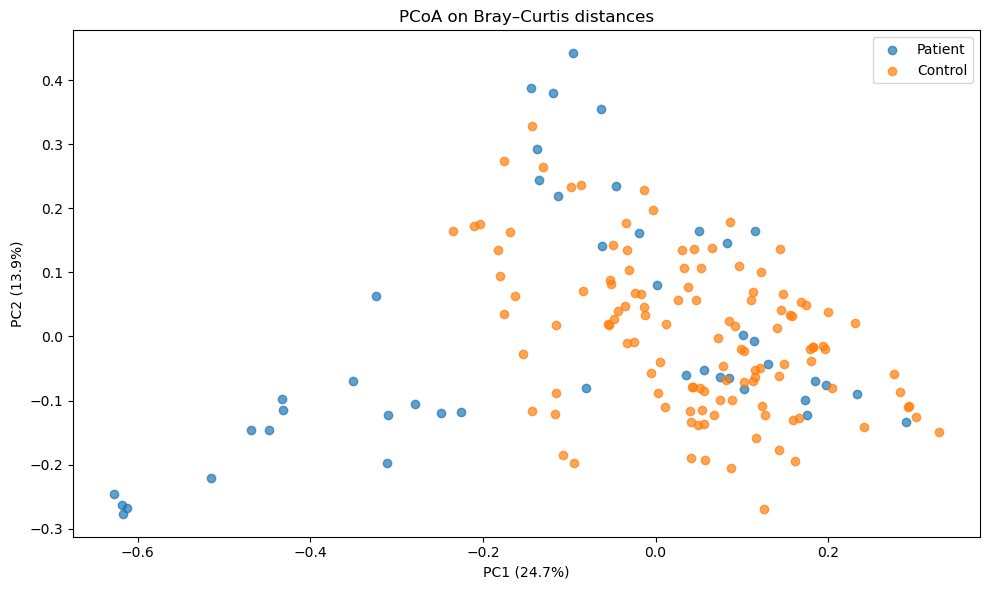


PERMANOVA results:
method name               PERMANOVA
test statistic name        pseudo-F
sample size                     164
number of groups                  2
test statistic             10.64029
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


In [33]:
def run_beta_diversity_analysis(df_alpha, abundance_cols):
    abundance_data = df_alpha[abundance_cols].fillna(0).values
    sample_ids = df_alpha.index.astype(str).tolist()

    # Bray-Curtis matrix
    bc_matrix = beta_diversity("braycurtis", abundance_data, ids=sample_ids)

    # PCoA
    pcoa_results = pcoa(bc_matrix)

    # Plotting
    df_pcoa = pcoa_results.samples
    df_pcoa["group"] = df_alpha["group"].values
    df_pcoa["person"] = df_alpha["person"].values

    fig, ax = plt.subplots(figsize=(10, 6))
    for group in df_pcoa["group"].unique():
        subset = df_pcoa[df_pcoa["group"] == group]
        ax.scatter(subset["PC1"], subset["PC2"], label=group, alpha=0.7)

    ax.set_title("PCoA on Bray–Curtis distances")
    ax.set_xlabel(f"PC1 ({pcoa_results.proportion_explained[0]*100:.1f}%)")
    ax.set_ylabel(f"PC2 ({pcoa_results.proportion_explained[1]*100:.1f}%)")
    ax.legend()
    plt.tight_layout()
    plt.show()

    # PERMANOVA
    df_meta = df_alpha[["group"]].copy()
    df_meta.index = sample_ids

    result = permanova(distance_matrix=bc_matrix, grouping=df_meta["group"], permutations=999)
    print("\nPERMANOVA results:")
    print(result)
    
run_beta_diversity_analysis(df_alpha, abundance_cols)


C:\Users\d.tawadros\AppData\Local\Temp\ipykernel_43036\3759663196.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_top["group"] = df_alpha["group"].values


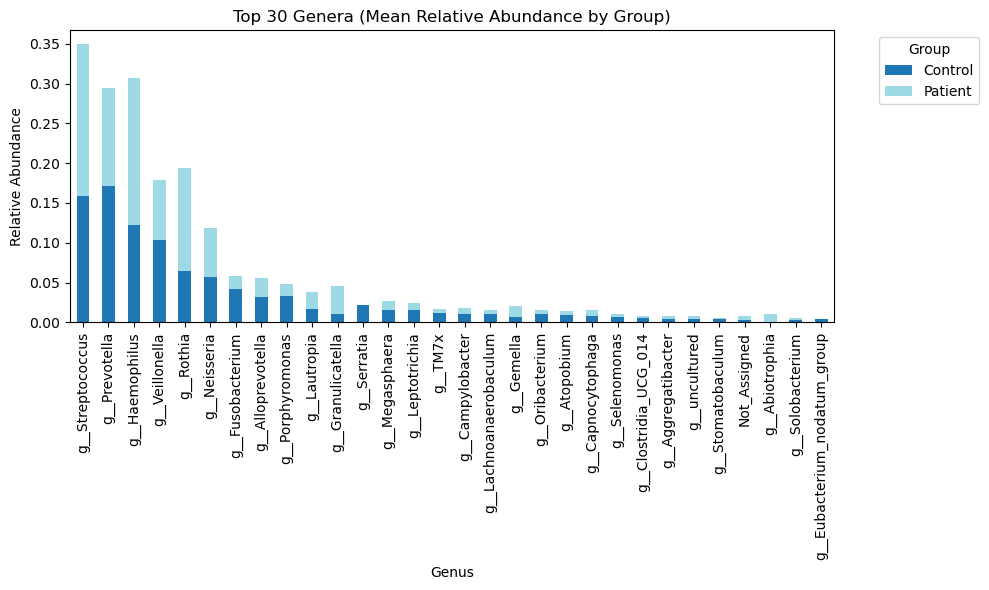

In [34]:
def compute_relative_abundance(df, abundance_cols):
    abundance_data = df[abundance_cols].fillna(0)
    row_sums = abundance_data.sum(axis=1)
    return abundance_data.div(row_sums, axis=0)

def plot_top_genera_barplot(df_alpha, abundance_cols, top_n=10):
    # Compute relative abundance
    rel_abundance = compute_relative_abundance(df_alpha, abundance_cols)

    # Get top N genera overall
    top_genera = rel_abundance.mean().sort_values(ascending=False).head(top_n).index.tolist()
    rel_top = rel_abundance[top_genera]
    rel_top["group"] = df_alpha["group"].values

    # Average by group
    group_means = rel_top.groupby("group").mean().T

    # Plot
    group_means.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="tab20")
    plt.title(f"Top {top_n} Genera (Mean Relative Abundance by Group)")
    plt.ylabel("Relative Abundance")
    plt.xlabel("Genus")
    plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

plot_top_genera_barplot(df_alpha, abundance_cols, top_n=30)


- The genera listed show statistically significant differences in abundance between groups.

- For example, g__Absconditabacteriales_(SR1) and g__Eubacterium_brachy_group are markedly more abundant in controls than in patients.

- Several genera like g__Granulicatella appear more abundant in patients.

- Very small raw p-values (e.g., <1e-10) suggest highly robust differences.

- Bonferroni correction controls for Type I error across multiple comparisons, maintaining the reliability of findings.

In [35]:
def genus_level_stats(df_alpha, abundance_cols, method="mannwhitney"):
    rel_abundance = compute_relative_abundance(df_alpha, abundance_cols)
    rel_abundance["group"] = df_alpha["group"]

    result_rows = []
    for genus in abundance_cols:
        group_data = rel_abundance[[genus, "group"]].dropna()
        g1 = group_data[group_data["group"] == "Patient"][genus]
        g2 = group_data[group_data["group"] == "Control"][genus]

        if len(g1) > 1 and len(g2) > 1:
            stat, p = mannwhitneyu(g1, g2, alternative="two-sided")
            result_rows.append((genus, g1.mean(), g2.mean(), p))

    df_stats = pd.DataFrame(result_rows, columns=["Genus", "Mean_Patient", "Mean_Control", "p_value"])
    df_stats["p_adj"] = df_stats["p_value"] * len(df_stats)  # Bonferroni correction
    df_stats.sort_values("p_value", inplace=True)
    print("\nTop differential genera (sorted by p-value):")
    print(df_stats.head(10).to_string(index=False))

    return df_stats

genus_stats = genus_level_stats(df_alpha, abundance_cols)



Top differential genera (sorted by p-value):
                         Genus  Mean_Patient  Mean_Control      p_value        p_adj
g__Absconditabacteriales_(SR1)      0.000005      0.001692 3.616562e-16 2.206103e-14
   g__Eubacterium_brachy_group      0.000024      0.000681 2.205459e-14 1.345330e-12
                  g__Scardovia      0.001204      0.000101 3.436178e-12 2.096069e-10
             g__Stomatobaculum      0.001252      0.004777 5.511441e-12 3.361979e-10
                g__Peptococcus      0.000000      0.000448 4.802400e-11 2.929464e-09
  g__Eubacterium_nodatum_group      0.000803      0.003681 1.485039e-09 9.058740e-08
                g__Johnsonella      0.000000      0.001253 1.239000e-08 7.557900e-07
             g__Granulicatella      0.035233      0.009864 1.679463e-08 1.024473e-06
               g__Butyrivibrio      0.000000      0.000356 5.833017e-08 3.558140e-06
              g__Fusobacterium      0.016902      0.041541 2.898561e-07 1.768122e-05


## TODO: Top 10 delta 

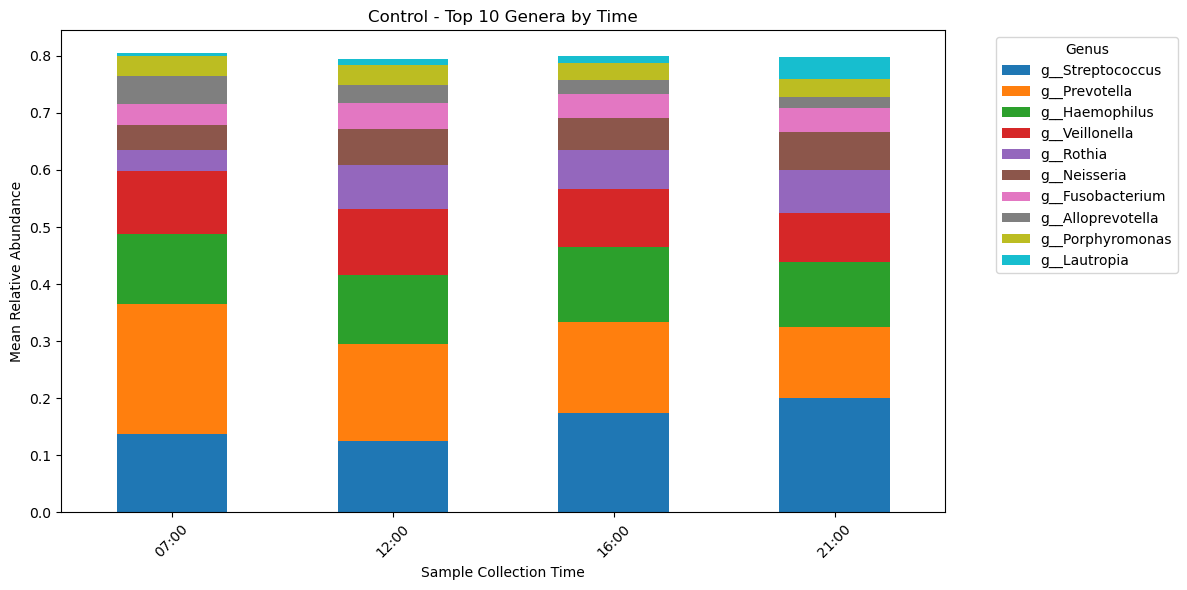

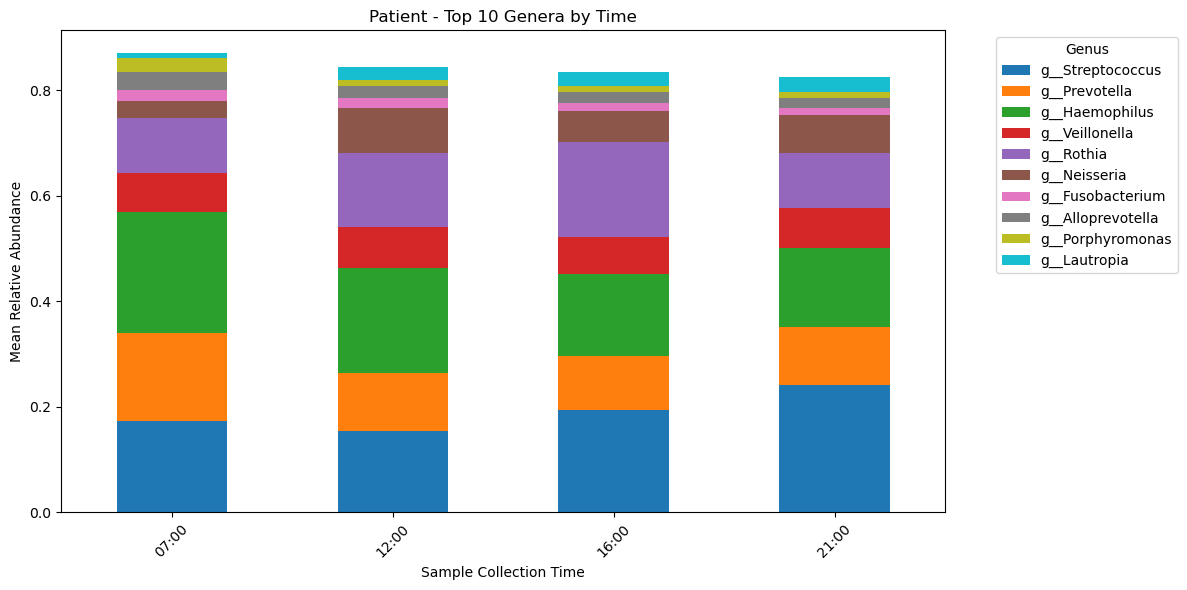

In [36]:
def plot_top_genera_by_time(df_alpha, abundance_cols, top_n=10):
    rel_abundance = compute_relative_abundance(df_alpha, abundance_cols)
    rel_abundance["sample_n_time"] = df_alpha["sample_n_time"]
    rel_abundance["group"] = df_alpha["group"]

    # Get top genera overall
    top_genera = rel_abundance[abundance_cols].mean().sort_values(ascending=False).head(top_n).index.tolist()

    # Group by time and group
    grouped = rel_abundance.groupby(["group", "sample_n_time"])[top_genera].mean().reset_index()

    # Plot per group
    for group in grouped["group"].unique():
        df_group = grouped[grouped["group"] == group].set_index("sample_n_time")
        df_group = df_group[top_genera]
        df_group.plot(kind="bar", stacked=True, figsize=(12, 6), title=f"{group} - Top {top_n} Genera by Time")
        plt.ylabel("Mean Relative Abundance")
        plt.xlabel("Sample Collection Time")
        plt.xticks(rotation=45)
        plt.legend(title="Genus", bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

plot_top_genera_by_time(df_alpha, abundance_cols, top_n=10)



#### Interpretation

- **Consistent Trends**: Genera such as `g__Absconditabacteriales_(SR1)` and `g__Eubacterium_brachy_group` appear in both top genus-level and time-stratified results.
- **Time-Specific Patterns**: Differential abundance is **most evident at 07:00**, hinting at temporal variation in microbial communities.
- Some differential genera are consistently different across multiple time points, indicating robust group-level microbial signatures.
- **For example**, Absconditabacteriales (SR1) is consistently less abundant in Patients at multiple times. Scardovia is transiently enriched in Patients at 12:00, which might reflect activity, medication, or host changes during the day.

In [37]:
def genus_stats_by_time(df_alpha, abundance_cols, method="mannwhitney"):
    rel_abundance = compute_relative_abundance(df_alpha, abundance_cols)
    rel_abundance["sample_n_time"] = df_alpha["sample_n_time"]
    rel_abundance["group"] = df_alpha["group"]

    timepoints = rel_abundance["sample_n_time"].dropna().unique()
    timepoints.sort()

    all_results = []

    for time in timepoints:
        subset = rel_abundance[rel_abundance["sample_n_time"] == time]
        for genus in abundance_cols:
            g1 = subset[subset["group"] == "Patient"][genus].dropna()
            g2 = subset[subset["group"] == "Control"][genus].dropna()

            if len(g1) > 1 and len(g2) > 1:
                stat, p = mannwhitneyu(g1, g2, alternative="two-sided")
                all_results.append((time, genus, g1.mean(), g2.mean(), p))

    df_time_stats = pd.DataFrame(all_results, columns=["Time", "Genus", "Mean_Patient", "Mean_Control", "p_value"])
    df_time_stats["p_adj"] = df_time_stats["p_value"] * len(df_time_stats)  # Bonferroni
    df_time_stats.sort_values("p_value", inplace=True)

    print("\nTop genus-time differences (sorted by p-value):")
    print(df_time_stats.head(10).to_string(index=False))
    return df_time_stats

genus_time_stats = genus_stats_by_time(df_alpha, abundance_cols)



Top genus-time differences (sorted by p-value):
 Time                          Genus  Mean_Patient  Mean_Control  p_value    p_adj
07:00 g__Absconditabacteriales_(SR1)      0.000000      0.001825 0.000004 0.001020
07:00    g__Eubacterium_brachy_group      0.000000      0.000643 0.000032 0.007694
16:00 g__Absconditabacteriales_(SR1)      0.000000      0.001423 0.000036 0.008695
12:00                   g__Scardovia      0.000840      0.000122 0.000037 0.009060
07:00              g__Stomatobaculum      0.000750      0.004254 0.000050 0.012267
12:00    g__Eubacterium_brachy_group      0.000021      0.000805 0.000093 0.022806
12:00 g__Absconditabacteriales_(SR1)      0.000004      0.002152 0.000184 0.044925
07:00                g__Butyrivibrio      0.000000      0.000772 0.000188 0.045800
21:00                  g__uncultured      0.004155      0.005376 0.000275 0.067017
21:00                    g__Serratia      0.000766      0.019025 0.000282 0.068886


### Differential abundance analysis identifies which microbial taxa (here genera) are present in significantly different amounts in one group compared to another.



In [38]:
def get_top_differential_genera(df_alpha, abundance_cols, top_n=5):
    rel_abundance = compute_relative_abundance(df_alpha, abundance_cols)
    rel_abundance["group"] = df_alpha["group"]

    results = []
    for genus in abundance_cols:
        g1 = rel_abundance[rel_abundance["group"] == "Patient"][genus].dropna()
        g2 = rel_abundance[rel_abundance["group"] == "Control"][genus].dropna()
        if len(g1) > 1 and len(g2) > 1:
            stat, p = mannwhitneyu(g1, g2)
            results.append((genus, g1.mean(), g2.mean(), p))

    df_results = pd.DataFrame(results, columns=["Genus", "Mean_Patient", "Mean_Control", "p_value"])
    df_results.sort_values("p_value", inplace=True)
    top_genera = df_results["Genus"].head(top_n).tolist()
    
    print(f"\nTop {top_n} Differential Genera:")
    print(df_results.head(top_n).to_string(index=False))
    
    return top_genera

top_genera = get_top_differential_genera(df_alpha, abundance_cols, top_n=5)



Top 5 Differential Genera:
                         Genus  Mean_Patient  Mean_Control      p_value
g__Absconditabacteriales_(SR1)      0.000005      0.001692 3.616562e-16
   g__Eubacterium_brachy_group      0.000024      0.000681 2.205459e-14
                  g__Scardovia      0.001204      0.000101 3.436178e-12
             g__Stomatobaculum      0.001252      0.004777 5.511441e-12
                g__Peptococcus      0.000000      0.000448 4.802400e-11



Top 5 Differential Genera:
                         Genus  Mean_Patient  Mean_Control      p_value
g__Absconditabacteriales_(SR1)      0.000005      0.001692 3.616562e-16
   g__Eubacterium_brachy_group      0.000024      0.000681 2.205459e-14
                  g__Scardovia      0.001204      0.000101 3.436178e-12
             g__Stomatobaculum      0.001252      0.004777 5.511441e-12
                g__Peptococcus      0.000000      0.000448 4.802400e-11


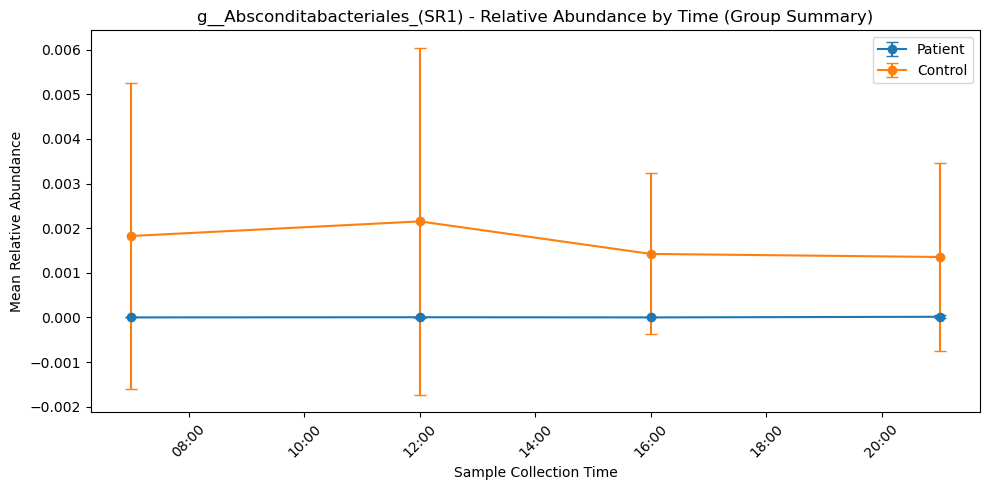

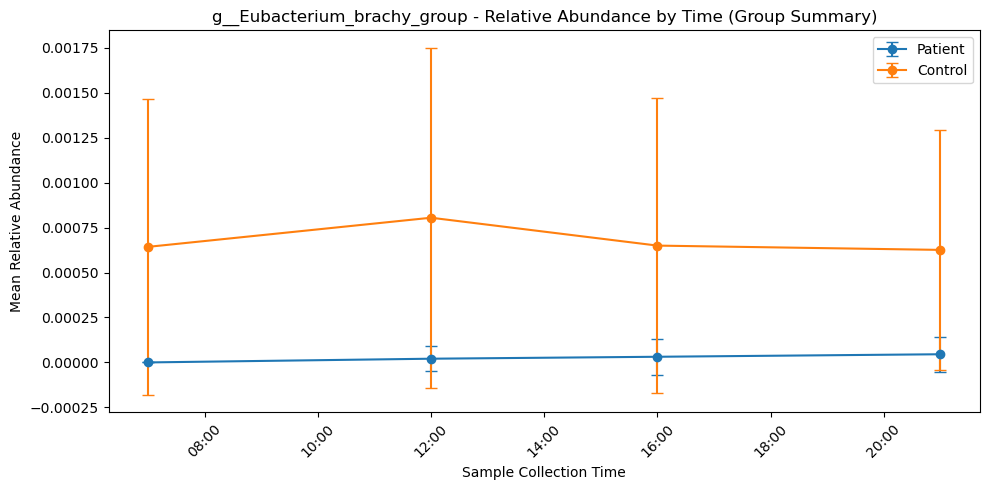

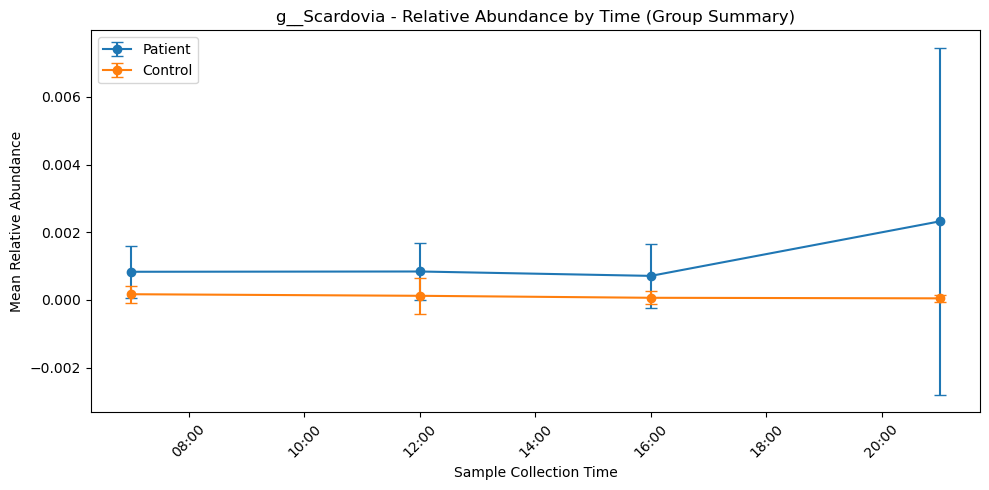

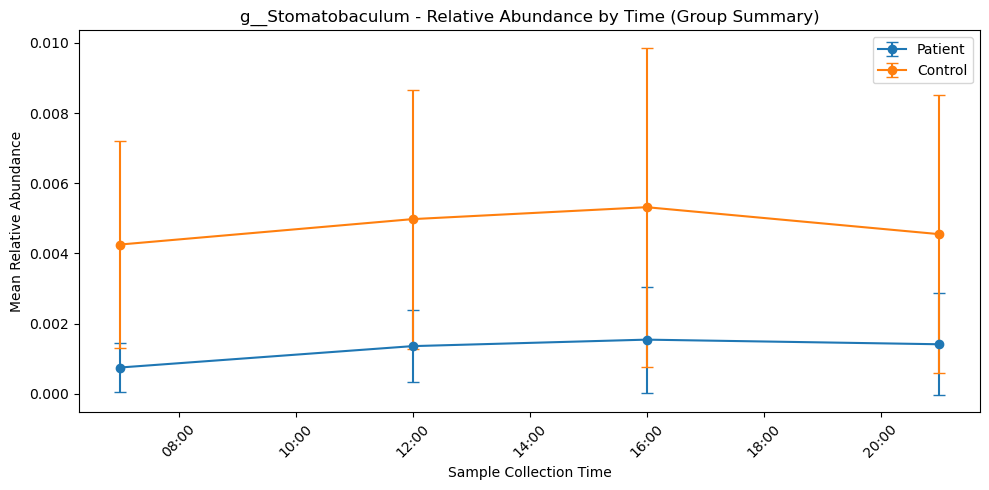

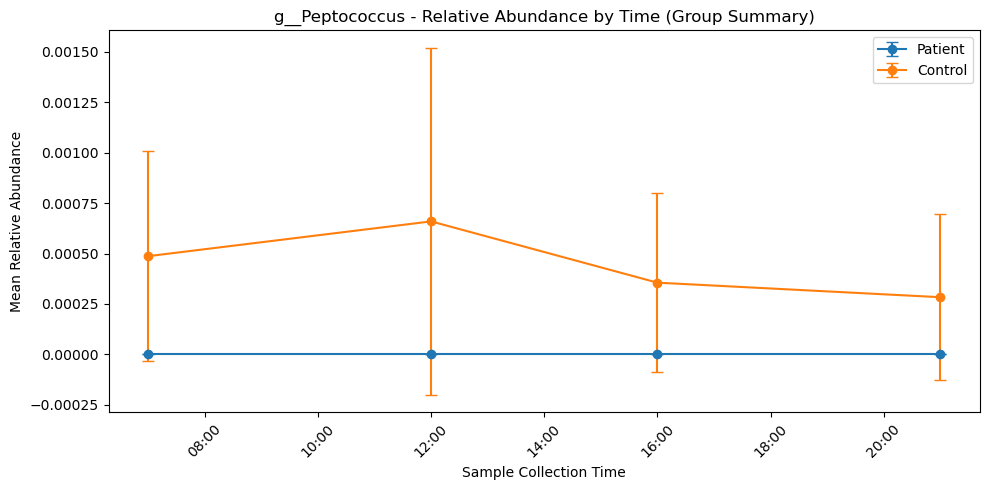

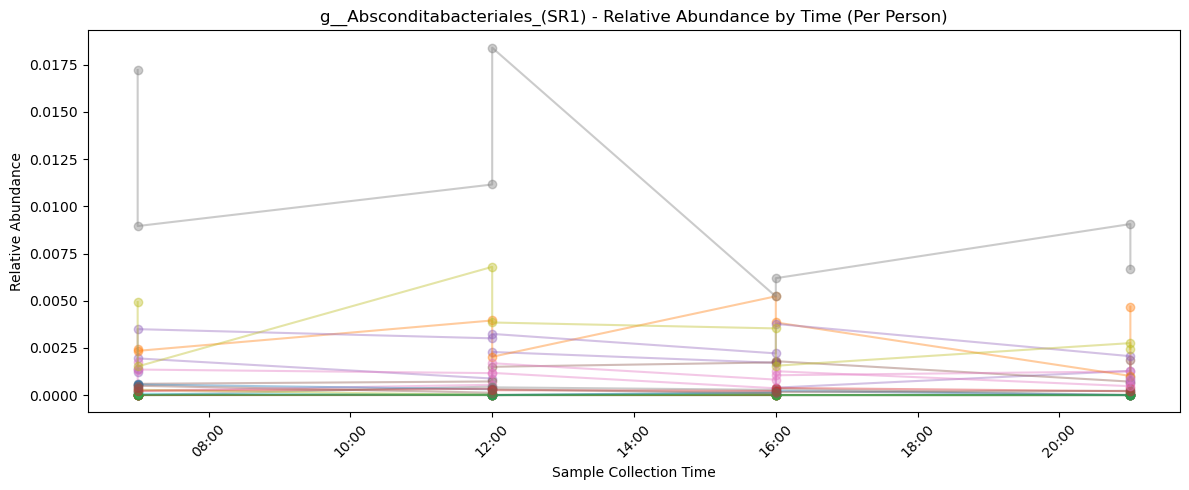

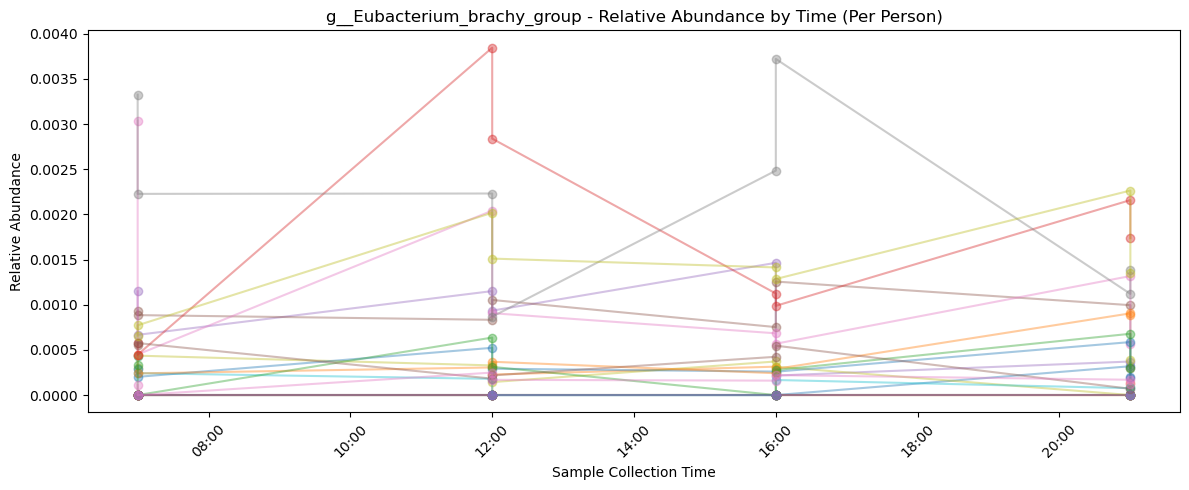

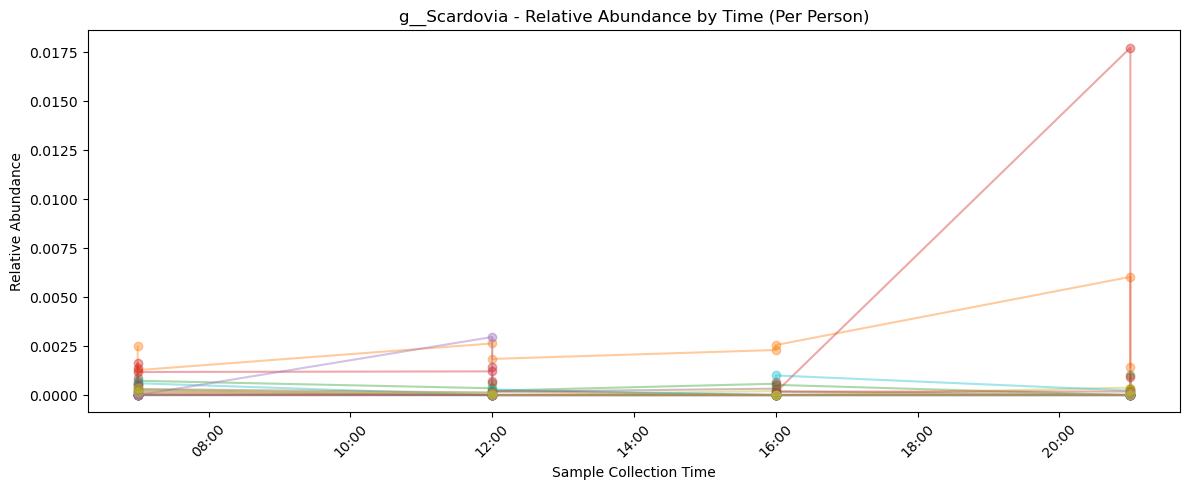

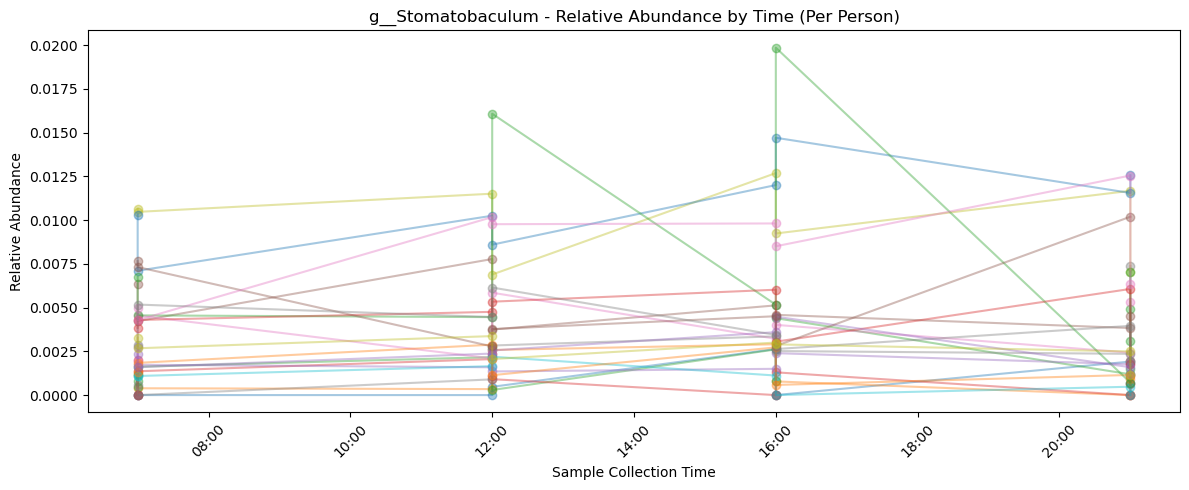

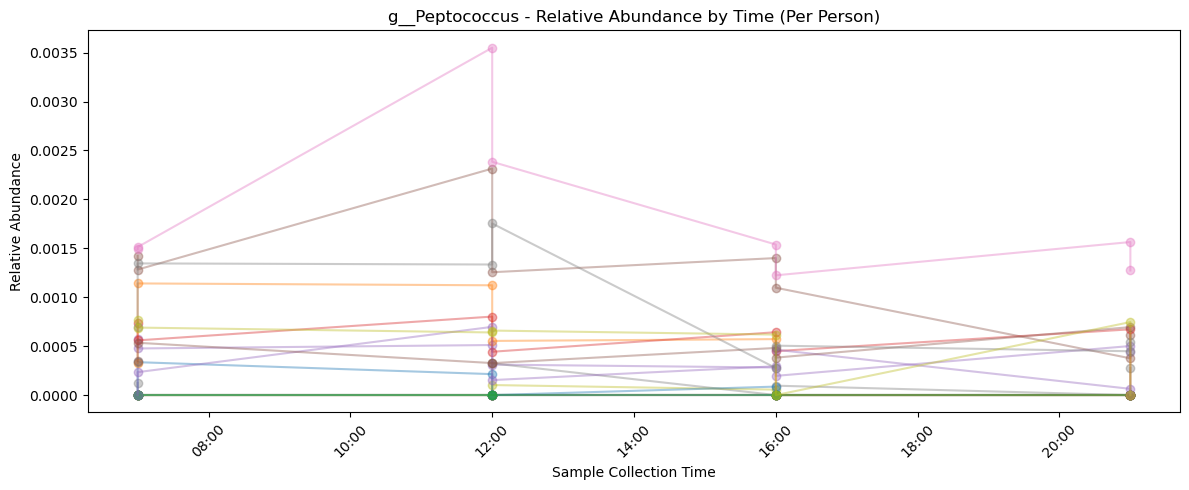

In [40]:
from matplotlib.dates import DateFormatter

def plot_top_genera_by_time_per_person(df_alpha, abundance_cols, top_genera):
    rel_abundance = compute_relative_abundance(df_alpha, abundance_cols)
    rel_abundance["sample_n_time"] = pd.to_datetime(df_alpha["sample_n_time"], format="%H:%M")
    rel_abundance["person"] = df_alpha["person"]
    rel_abundance["group"] = df_alpha["group"]
    rel_abundance["person_group"] = df_alpha["person"].astype(str) + " (" + df_alpha["group"] + ")"

    for genus in top_genera:
        fig, ax = plt.subplots(figsize=(12, 5))
        for person in rel_abundance["person_group"].unique():
            person_data = rel_abundance[rel_abundance["person_group"] == person].sort_values("sample_n_time")
            ax.plot(person_data["sample_n_time"], person_data[genus], marker='o', alpha=0.4, label=person)

        ax.set_title(f"{genus} - Relative Abundance by Time (Per Person)")
        ax.set_xlabel("Sample Collection Time")
        ax.set_ylabel("Relative Abundance")
        ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def plot_top_genera_by_time_group(df_alpha, abundance_cols, top_genera):
    rel_abundance = compute_relative_abundance(df_alpha, abundance_cols)
    rel_abundance["sample_n_time"] = pd.to_datetime(df_alpha["sample_n_time"], format="%H:%M")
    rel_abundance["group"] = df_alpha["group"]

    for genus in top_genera:
        fig, ax = plt.subplots(figsize=(10, 5))
        for group in rel_abundance["group"].unique():
            group_data = rel_abundance[rel_abundance["group"] == group]
            summary = group_data.groupby("sample_n_time")[genus].agg(['mean', 'std']).reset_index()
            summary = summary.dropna()
            ax.errorbar(summary["sample_n_time"], summary["mean"], yerr=summary["std"],
                        label=group, capsize=4, marker='o')

        ax.set_title(f"{genus} - Relative Abundance by Time (Group Summary)")
        ax.set_xlabel("Sample Collection Time")
        ax.set_ylabel("Mean Relative Abundance")
        ax.xaxis.set_major_formatter(DateFormatter("%H:%M"))
        ax.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
top_genera = get_top_differential_genera(df_alpha, abundance_cols, top_n=5)
plot_top_genera_by_time_group(df_alpha, abundance_cols, top_genera)
plot_top_genera_by_time_per_person(df_alpha, abundance_cols, top_genera)


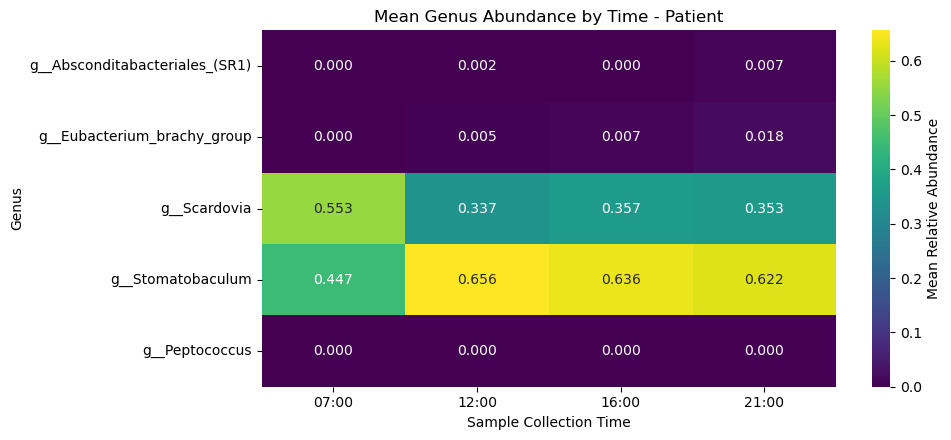

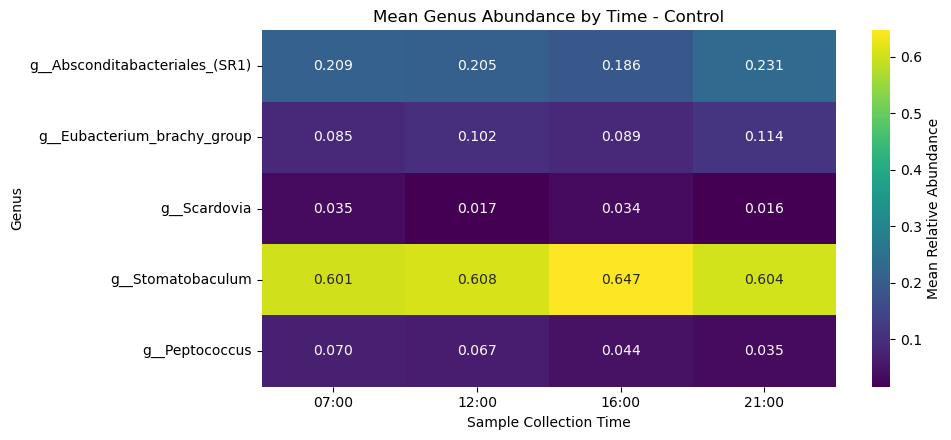

In [60]:
def plot_genus_heatmap_by_time(df_alpha, genera):
    rel_abundance = compute_relative_abundance(df_alpha, genera)
    rel_abundance["sample_n_time"] = df_alpha["sample_n_time"]
    rel_abundance["group"] = df_alpha["group"]

    for group in rel_abundance["group"].unique():
        df_group = rel_abundance[rel_abundance["group"] == group]
        heatmap_data = df_group.groupby("sample_n_time")[genera].mean().T
        heatmap_data = heatmap_data[sorted(heatmap_data.columns)]  # sort times

        plt.figure(figsize=(10, len(genera) * 0.5 + 2))
        sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".3f", cbar_kws={"label": "Mean Relative Abundance"})
        plt.title(f"Mean Genus Abundance by Time - {group}")
        plt.xlabel("Sample Collection Time")
        plt.ylabel("Genus")
        plt.tight_layout()
        plt.show()
plot_genus_heatmap_by_time(df_alpha, top_genera)


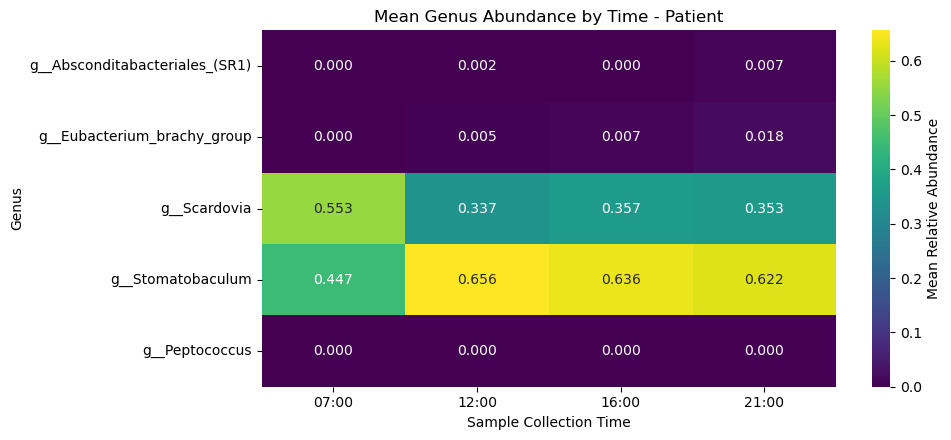

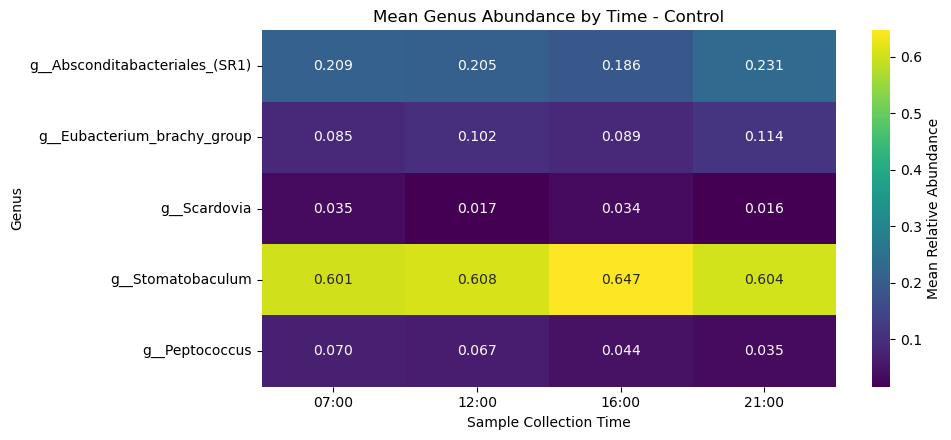

In [61]:
def plot_top_genera_boxplots_by_time(df_alpha, top_genera):
    rel_abundance = compute_relative_abundance(df_alpha, top_genera)
    rel_abundance["sample_n_time"] = df_alpha["sample_n_time"]
    rel_abundance["group"] = df_alpha["group"]

    df_plot = rel_abundance.copy()
    df_plot["Time"] = pd.to_datetime(df_plot["sample_n_time"], format="%H:%M")

    for genus in top_genera:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x="Time", y=genus, hue="group", data=df_plot, showfliers=False)
        plt.title(f"{genus} - Relative Abundance by Time (Boxplot)")
        plt.ylabel("Relative Abundance")
        plt.xlabel("Sample Collection Time")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_genus_heatmap_by_time(df_alpha, top_genera)


### Volcano Plot: Differential Abundance Between Patients and Controls

This is a differential abundance analysis combined with a volcano plot visualization:
- It compares each genus's relative abundance between Patients and Controls.
- It answers: Which microbial genera are significantly more or less abundant in one group compared to the other?

#### Visulalizes
X-axis: Log2 Fold Change (Patient - Control)
→ Shows how much a genus is increased (right) or decreased (left) in Patients vs. Controls.

Y-axis: -log10(p-value)
→ Shows how statistically significant the difference is (higher = more significant).


#### Colors
- Red: Significantly enriched in Patients
- Blue: Significantly enriched in Controls
- Gray: Not statistically significant difference


Vertical dashed lines at log2FC = ±1: Threshold for meaningful fold change.

Horizontal dashed line at p = 0.05 (i.e., -log10(p) ≈ 1.3): Threshold for significance.

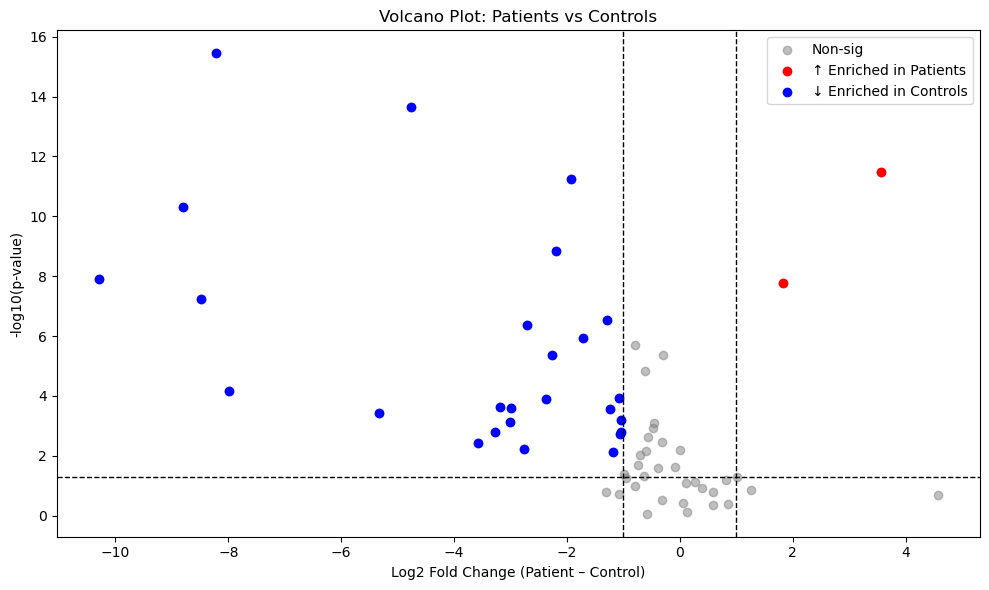

In [65]:
def plot_volcano(df_alpha, abundance_cols, group_col="group", group1="Patient", group2="Control", p_adj_method="bonferroni"):
    rel_abundance = compute_relative_abundance(df_alpha, abundance_cols)
    rel_abundance[group_col] = df_alpha[group_col]

    results = []

    for genus in abundance_cols:
        g1 = rel_abundance[rel_abundance[group_col] == group1][genus].dropna()
        g2 = rel_abundance[rel_abundance[group_col] == group2][genus].dropna()
        if len(g1) > 1 and len(g2) > 1:
            stat, p = mannwhitneyu(g1, g2)
            log2fc = np.log2(g1.mean() + 1e-6) - np.log2(g2.mean() + 1e-6)
            results.append((genus, log2fc, p))

    df_volcano = pd.DataFrame(results, columns=["Genus", "log2FC", "p_value"])

    # Adjust p-values
    if p_adj_method == "bonferroni":
        df_volcano["p_adj"] = df_volcano["p_value"] * len(df_volcano)
    elif p_adj_method == "fdr":
        df_volcano["p_adj"] = df_volcano["p_value"].rank(method='min') / len(df_volcano) * 0.05
    else:
        df_volcano["p_adj"] = df_volcano["p_value"]  # no adjustment

    df_volcano["-log10(p)"] = -np.log10(df_volcano["p_value"])

    # Plot
    plt.figure(figsize=(10, 6))
    sig = df_volcano["p_value"] < 0.05
    up = (df_volcano["log2FC"] > 1) & sig
    down = (df_volcano["log2FC"] < -1) & sig

    plt.scatter(df_volcano["log2FC"], df_volcano["-log10(p)"], color="gray", alpha=0.5, label="Non-sig")
    plt.scatter(df_volcano[up]["log2FC"], df_volcano[up]["-log10(p)"], color="red", label="↑ Enriched in Patients")
    plt.scatter(df_volcano[down]["log2FC"], df_volcano[down]["-log10(p)"], color="blue", label="↓ Enriched in Controls")

    plt.axhline(-np.log10(0.05), color="black", linestyle="--", linewidth=1)
    plt.axvline(1, color="black", linestyle="--", linewidth=1)
    plt.axvline(-1, color="black", linestyle="--", linewidth=1)

    plt.title("Volcano Plot: Patients vs Controls")
    plt.xlabel("Log2 Fold Change (Patient – Control)")
    plt.ylabel("-log10(p-value)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return df_volcano.sort_values("p_value")

volcano_df = plot_volcano(df_alpha, abundance_cols, p_adj_method="bonferroni")


### Wilcoxon Signed-Rank Test: Patients Over Time

The Wilcoxon signed-rank test is a non-parametric statistical test used to compare two related samples or repeated measurements on a single sample to assess whether their population mean ranks differ. It is the non-parametric alternative to the paired t-test.

This test is particularly useful when the assumptions of the paired t-test are violated.

In this analysis, we compared the same patients' diversity metrics at two timepoints (07:00 and 21:00) using the Wilcoxon signed-rank test.

### Methodology

Subset Data: Only samples from 07:00 and 21:00 were used.

Paired Matching: For each individual ("person"), the metric values at both times were paired.

Averaging: If a person had multiple samples per timepoint, their average was taken.

Wilcoxon Test: Applied to paired data to evaluate if there is a significant change from morning to night.

### Results

1. Shannon Diversity

Wilcoxon signed-rank test for shannon: 07:00 → 21:00
n = 19, stat = 71.000, p = 0.3525

#### Interpretation:

There was no statistically significant change in Shannon diversity between 07:00 and 21:00.

The p-value (> 0.05) suggests that within-subject microbial diversity remained relatively stable throughout the day.

2. Richness

Wilcoxon signed-rank test for richness: 07:00 → 21:00
n = 19, stat = 62.000, p = 0.7563

#### Interpretation:

Similarly, there was no significant difference in richness between these two timepoints.

The very high p-value indicates almost no consistent change in the number of observed taxa.



In [ ]:
from scipy.stats import wilcoxon

def run_wilcoxon_within_patient(df_alpha, metric, time1, time2):
    # Step 1: Filter for the two times
    df_filtered = df_alpha[df_alpha["sample_n_time"].isin([time1, time2])]

    # Step 2: Keep one value per person/time (use mean in case of duplicates)
    df_reduced = (
        df_filtered.groupby(["person", "sample_n_time"])[metric]
        .mean()
        .unstack()  # turns into a wide format with columns = times
    )

    # Step 3: Drop rows with missing either time
    df_paired = df_reduced.dropna(subset=[time1, time2])

    # Step 4: Run Wilcoxon
    if df_paired.shape[0] >= 5:
        stat, p = wilcoxon(df_paired[time1], df_paired[time2])
        print(f"\nWilcoxon signed-rank test for {metric}: {time1} → {time2}")
        print(f"n = {df_paired.shape[0]}, stat = {stat:.3f}, p = {p:.4f}")
    else:
        print("Not enough paired data for Wilcoxon test.")


run_wilcoxon_within_patient(df_alpha, "shannon", "07:00", "21:00")
run_wilcoxon_within_patient(df_alpha, "richness", "07:00", "21:00")

###########maybe plot these within person shifts??



Wilcoxon signed-rank test for shannon: 07:00 → 21:00
n = 19, stat = 71.000, p = 0.3525

Wilcoxon signed-rank test for richness: 07:00 → 21:00
n = 19, stat = 62.000, p = 0.7563
